**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.dpi']=500  #resolution

from collections import defaultdict

In [2]:
def draw_list(ts_list, attribute, ts_number=1000, time = None , formatter = None):
    if ts_number >= len(ts_list): ts_number = len(ts_list)-1
    fig = plt.figure()
    ax = fig.subplots()
    for ts in ts_list[:ts_number]:
        if time == None: index = list(ts.index.values)
        else: index= ts[time]
        ax.plot(index, ts[attribute])
    ax.set_ylabel(attribute)
    if formatter !=None:
        date_form = DateFormatter(formatter)
        ax.xaxis.set_major_formatter(date_form)
    plt.show()

# Data Preparation

In [3]:
time_col = 'date'

attributes = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


df=pd.read_csv(r'../../data/datatraining.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())

mon1=df[df['Weekday']==0][attributes].copy()
tue1=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed1=df[df['Weekday']==2][attributes].copy() #incompleted too
thu1=df[df['Weekday']==3][attributes].copy()
fri1=df[df['Weekday']==4][attributes].copy()
sat1=df[df['Weekday']==5][attributes].copy()
sun1=df[df['Weekday']==6][attributes].copy()
    
weekdays1 = [thu1,fri1,sat1,sun1,mon1] #I dont want incompleted days, so wednesday and tuesday are excluded



df=pd.read_csv(r'../../data/datatest2.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
                                 
mon2=df[df['Weekday']==0][attributes].copy()
tue2=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed2=df[df['Weekday']==2][attributes].copy() #incompleted too
thu2=df[df['Weekday']==3][attributes].copy()
fri2=df[df['Weekday']==4][attributes].copy()
sat2=df[df['Weekday']==5][attributes].copy()
sun2=df[df['Weekday']==6][attributes].copy()
    
weekdays2 = [thu2,fri2,sat2,sun2,mon2] #I dont want incompleted days, so wednesday and tuesday are excluded


## Weeks

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


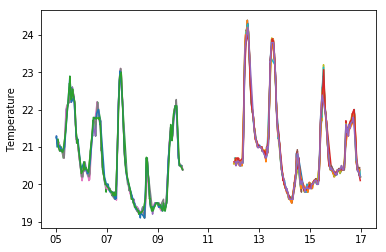

In [4]:
week_size = 144
week_list = []

week1 = pd.DataFrame()
for day in weekdays1:
    day.sort_values(time_col, inplace=True)#first of all: order
    week1 = week1.append(day, ignore_index=True )    ##a week

week1_list = []
tmp = week1.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week1_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
week2 = pd.DataFrame()
for day in weekdays2:    
    day.sort_values(time_col, inplace=True)#first of all: order
    week2 = week2.append(day, ignore_index=True)    ##a week
    
week2_list = []
tmp = week2.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week2_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
random.shuffle(week_list)
draw_list(week_list, 'Temperature', 15, time = time_col ,formatter = '%d')

## Days

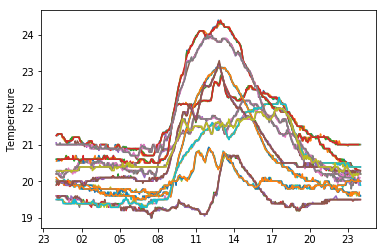

In [5]:
day_list = []
day_size = 360

day1_list=[]
for day in weekdays1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day1_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extra


day2_list = []
for day in weekdays2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day2_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


draw_list(day_list, 'Temperature', time = 'time', formatter = '%H')

## Day split

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


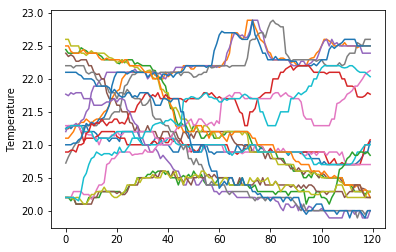

In [6]:
splits = 3 #night #morning #afternoon #evening 
part_size = day_size // splits
day_split = []

day1_split = []
for ts in day1_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day1_split.append(day_part)
    
day2_split = []
for ts in day2_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day2_split.append(day_part)

for day in day1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day2_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_split:
    day.reset_index(drop=True, inplace=True)    


    
draw_list(day1_split, 'Temperature', 21)

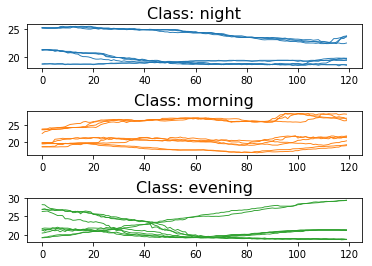

In [7]:
from sklearn import preprocessing

ts_list = []
for temp in day1_split:
    ts = temp['Humidity'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
X = np.array(ts_array)

def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 8 : return 'night'
     elif ts['date'][ts.index[ts_size//2]].hour < 16 : return 'morning'
     else: return 'evening'

labels = np.array([daypart(ts) for ts in day1_split])

y = preprocessing.LabelEncoder().fit_transform(labels)
plt.figure()
for i, classe in enumerate(['night','morning', 'evening']):
    plt.subplot(3, 1, i + 1)
    for x in X[labels == classe][:10]:
        plt.plot(x, color='C'+str(i), linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

#plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()


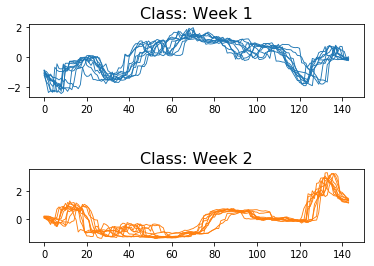

In [8]:
import time
from sklearn import preprocessing

ts_list = []
for temp in week_list:
    ts = temp['HumidityRatio'].copy()
    ts_list.append((ts-ts.mean())/ts.std())

ts_array = []
ts_size = len(week_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
X = np.array(ts_array)
week1o2 = lambda ts : 'Week 1' if ts['date'][ts.index[0]].day == 12 else 'Week 2'
labels = np.array([week1o2(ts) for ts in week_list])
y = preprocessing.LabelEncoder().fit_transform(labels)
X.shape

plt.figure()
for i, classe in enumerate(['Week 1','Week 2']):
    plt.subplot(2, 1, i + 1)
    for x in X[labels == classe][:10]:
        plt.plot(x, color='C'+str(i), linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

#plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()

# Shapelet Discovery

https://tslearn.readthedocs.io/en/latest/gen_modules/shapelets/tslearn.shapelets.ShapeletModel.html#tslearn.shapelets.ShapeletModel

https://www.kaggle.com/group16/shapelets

In [9]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 100
ts_sz 144
n_classes 2
shapelet_sizes {14: 4}


In [11]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [12]:
shp_clf.fit(X, y)

ValueError: Tensor-typed variable initializers must either be wrapped in an init_scope or callable (e.g., `tf.Variable(lambda : tf.truncated_normal([10, 40]))`) when building functions. Please file a feature request if this restriction inconveniences you.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

In [ ]:
predicted_locations = shp_clf.locate(X)

In [ ]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
"""
ts_id = 1
plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

ts_id = 2
plt.plot(X[ts_id].ravel(), color = 'green')
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
"""

In [ ]:
predicted_labels

## Shaplet Discovery 2

In [244]:
from shapelets_lts.classification import LtsShapeletClassifier

https://github.com/mohaseeb/shaplets-python

In [272]:
shp_clf = LtsShapeletClassifier(
    K=2,
    R=6,
    L_min=6,
    epocs=10,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)
"""
:param K: number of shapelets
:param R: scales of shapelet lengths
:param L_min: minimum shapelet length
"""

'\n:param K: number of shapelets\n:param R: scales of shapelet lengths\n:param L_min: minimum shapelet length\n'

In [273]:
shp_clf.fit(X, y)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation
epoch=1/10 (iteration=100) loss=1.162616703162401 validation accuracy=0.5
epoch=2/10 (iteration=200) loss=1.3082153169996358 validation accuracy=0.62
epoch=3/10 (iteration=300) loss=1.2819115158131078 validation accuracy=0.84
epoch=4/10 (iteration=400) loss=1.2288089131585889 validation accuracy=0.91
epoch=5/10 (iteration=500) loss=1.1729683233641595 validation accuracy=0.96
epoch=6/10 (iteration=600) loss=1.1173799525119161 validation accuracy=1.0
epoch=7/10 (iteration=700) loss=1.0622232838511236 validation accuracy=1.0
epoch=8/10 (iteration=800) loss=1.0073144197106843 validation accuracy=1.0
epoch=9/10 (iteration=900) loss=0.9529358573243739 validation accuracy=1.0
epoch=10/10 (iteration=1000) loss=0.8994926254711079 validation accuracy=1.0


LtsShapeletClassifier(K=2, L_min=6, R=6, alpha=-100, epocs=10, eta=0.01,
                      lamda=0.01, plot_loss=False,
                      shapelet_initialization='segments_centroids')

In [274]:
from sklearn.metrics import accuracy_score

In [275]:
y_pred = shp_clf.predict(X)

print("Correct classification rate:", accuracy_score(y, y_pred))

Correct classification rate: 1.0


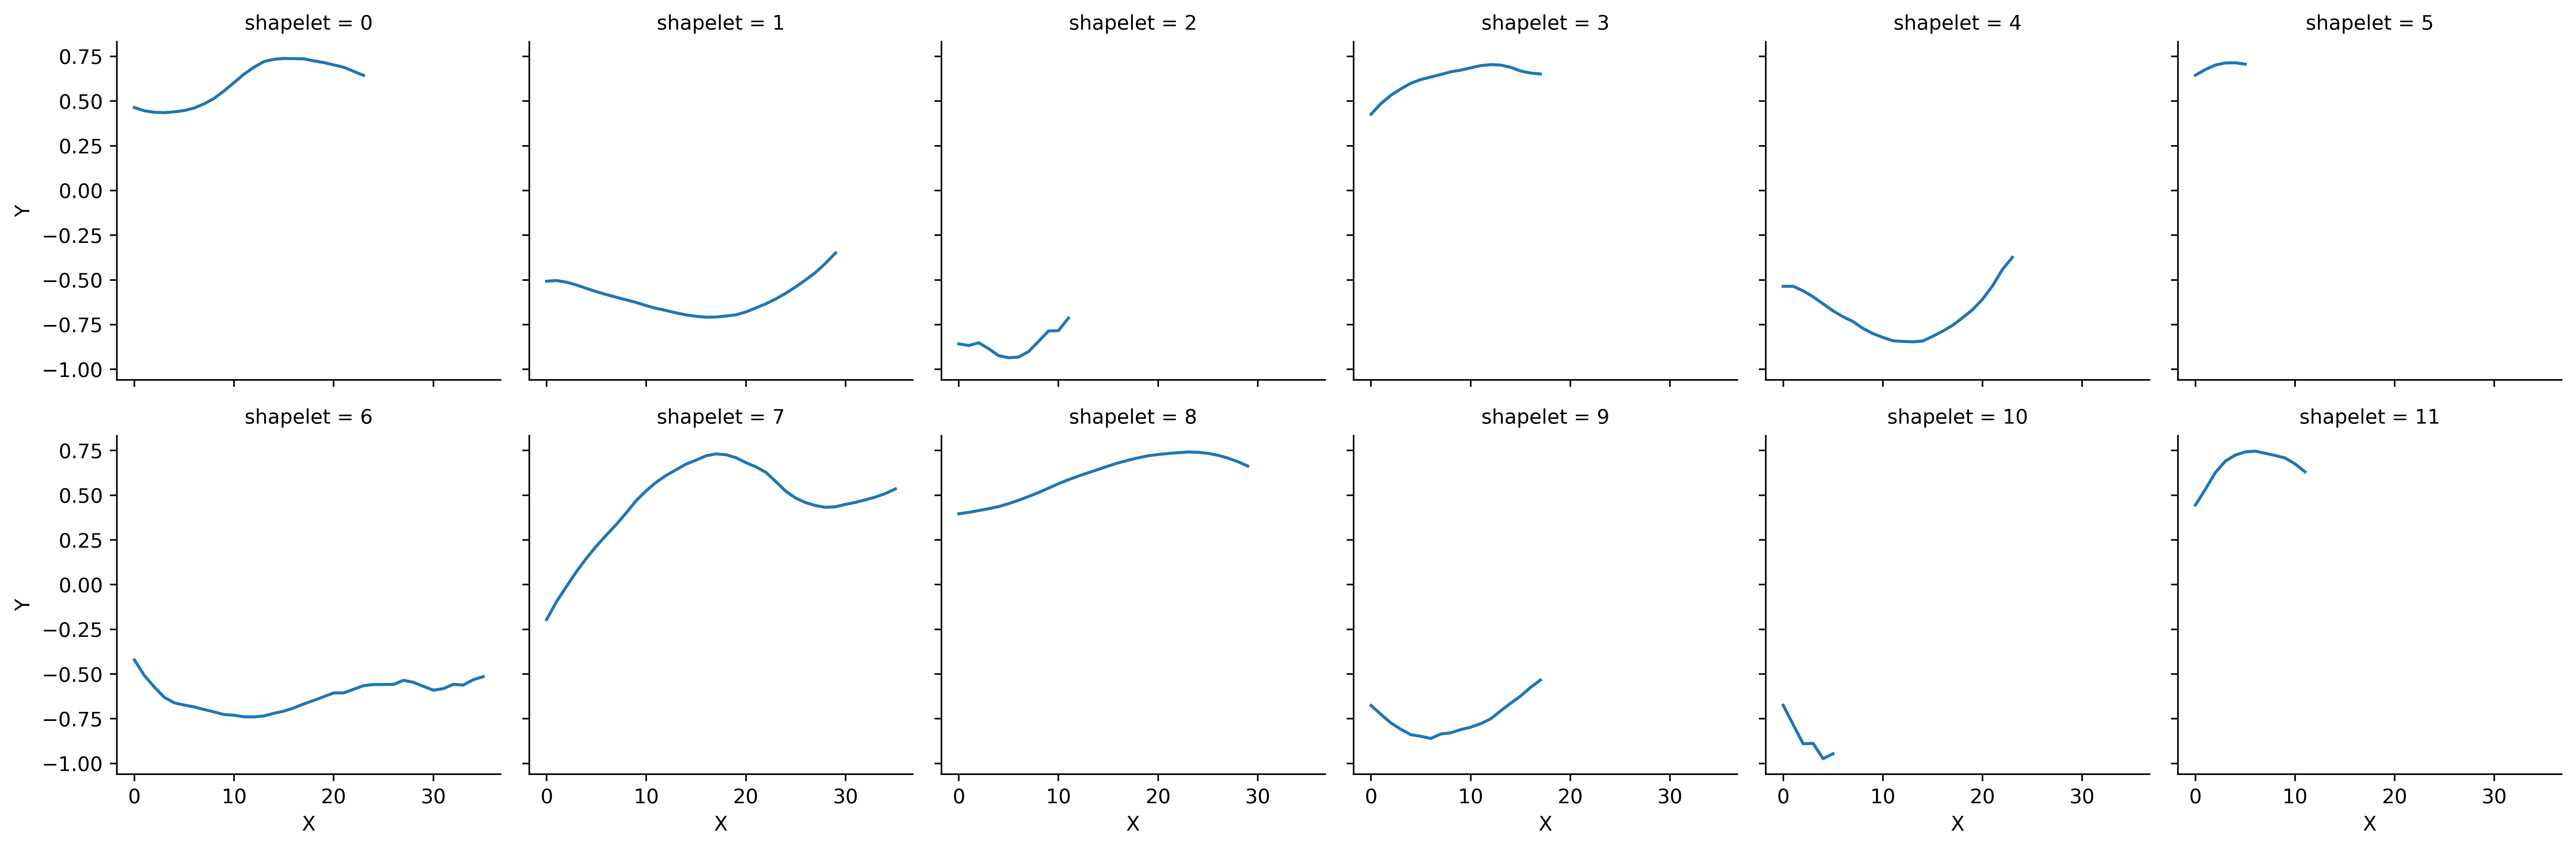

In [276]:
# retrieve the learnt shapelets
shapelets = shp_clf.get_shapelets()

# and plot sample shapelets
from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)

In [277]:
len(shapelets)

12

In [261]:
shapelets

[array([0.7146143 , 0.74671587, 0.75044935]),
 array([-0.85125005, -0.85832657, -0.84080065]),
 array([0.76771643, 0.78920763, 0.76295596, 0.74298486, 0.71494347,
        0.68546077]),
 array([-1.03867481, -0.98604163, -0.91670623, -0.85939526, -0.78796244,
        -0.80213344]),
 array([-0.87980678, -0.8982494 , -0.89043889, -0.89323537, -0.87999238,
        -0.85374752, -0.81871047, -0.79428096, -0.76206718]),
 array([0.57885356, 0.52101961, 0.50892176, 0.53831276, 0.5656742 ,
        0.61069815, 0.6555177 , 0.6906395 , 0.75815223])]

## Shaplet Discovery 3

In [52]:
from pyts.transformation import ShapeletTransform

https://pyts.readthedocs.io/en/stable/generated/pyts.transformation.ShapeletTransform.html#pyts.transformation.ShapeletTransform

In [53]:
st = ShapeletTransform(n_shapelets=2, window_sizes=[10])
st.fit(X, y)

ShapeletTransform(criterion='mutual_info', n_jobs=None, n_shapelets=2,
                  random_state=None, remove_similar=True, sort=False, verbose=0,
                  window_sizes=[10], window_steps=None)

In [54]:
len(st.shapelets_)

2

In [55]:
st.shapelets_

array([[ 1.76225012,  2.09199645,  1.86718235,  1.8584638 ,  2.93510695,
         3.24754517,  3.26267396,  3.30645701,  2.05580324,  1.78511422],
       [-2.11142231, -2.05233545, -2.38200545, -2.46877719, -0.80426087,
        -0.75360583, -0.70351215, -0.25829552, -0.3874454 , -0.4065734 ]])

<function matplotlib.pyplot.show(*args, **kw)>

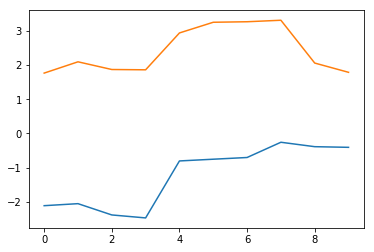

In [56]:
plt.plot(st.shapelets_[1])
plt.plot(st.shapelets_[0])
plt.show

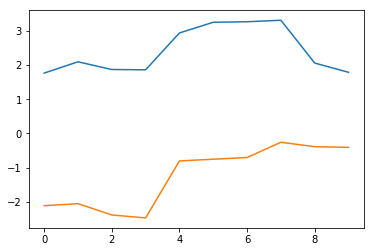

In [57]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

The indices for the corresponding shapelets in the training set. The first column consists of the indices of the samples. The second column consists of the starting indices (included) of the shapelets. The third column consists of the ending indices (excluded) of the shapelets.

In [60]:
st.indices_

array([[ 52, 130, 140],
       [ 99,   7,  17]], dtype=int64)

In [20]:
X[2][55:75]

array([-1.28968799, -1.28092666, -1.28092666, -1.2875242 , -1.25735688,
       -1.25097502, -1.24227231, -1.26121214, -1.23682633, -1.22904204,
       -1.22264326, -1.20395823, -1.22264326, -1.22449133, -1.10130968,
       -0.97632986, -0.89841439, -1.02222925, -1.00939207, -0.99468087])

In [21]:
st.scores_

array([0.69817218, 0.69817218])

In [49]:
# Shapelet transformation
X_train = X
y_train = y
st = ShapeletTransform(window_sizes=[12, 24, 36, 48],
                       random_state=42, sort=True)
X_new = st.fit_transform(X_train, y_train)

# Visualize the four most discriminative shapelets
plt.figure(figsize=(6, 4))
for i, index in enumerate(st.indices_[:4]):
    idx, start, end = index
    plt.plot(X_train[idx], color='C{}'.format(i),
             label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), X_train[idx, start:end],
             lw=5, color='C{}'.format(i))


plt.title('More discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=8)
plt.show()

KeyboardInterrupt: 

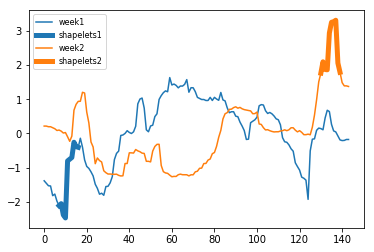

In [71]:
plt.figure(figsize=(6, 4))
for i, index in enumerate(st.indices_[::-1]):
    idx, start, end = index
    plt.plot(X_train[idx], color='C{}'.format(i))
    plt.plot(np.arange(start, end), X_train[idx, start:end],
             lw=5, color='C{}'.format(i))


plt.legend(['week1','shapelets1','week2','shapelets2'],loc='best', fontsize=8)
plt.show()

## Shaplet Discovery 4

In [237]:
from pyts.classification import LearningShapelets

https://pyts.readthedocs.io/en/stable/generated/pyts.classification.LearningShapelets.html#pyts.classification.LearningShapelets

In [238]:
shp_clf = LearningShapelets(random_state=42, tol=0.01)

In [239]:
shp_clf.fit(X, y)

KeyboardInterrupt: 

In [ ]:
len(shp_clf.shapelets_[0])

60

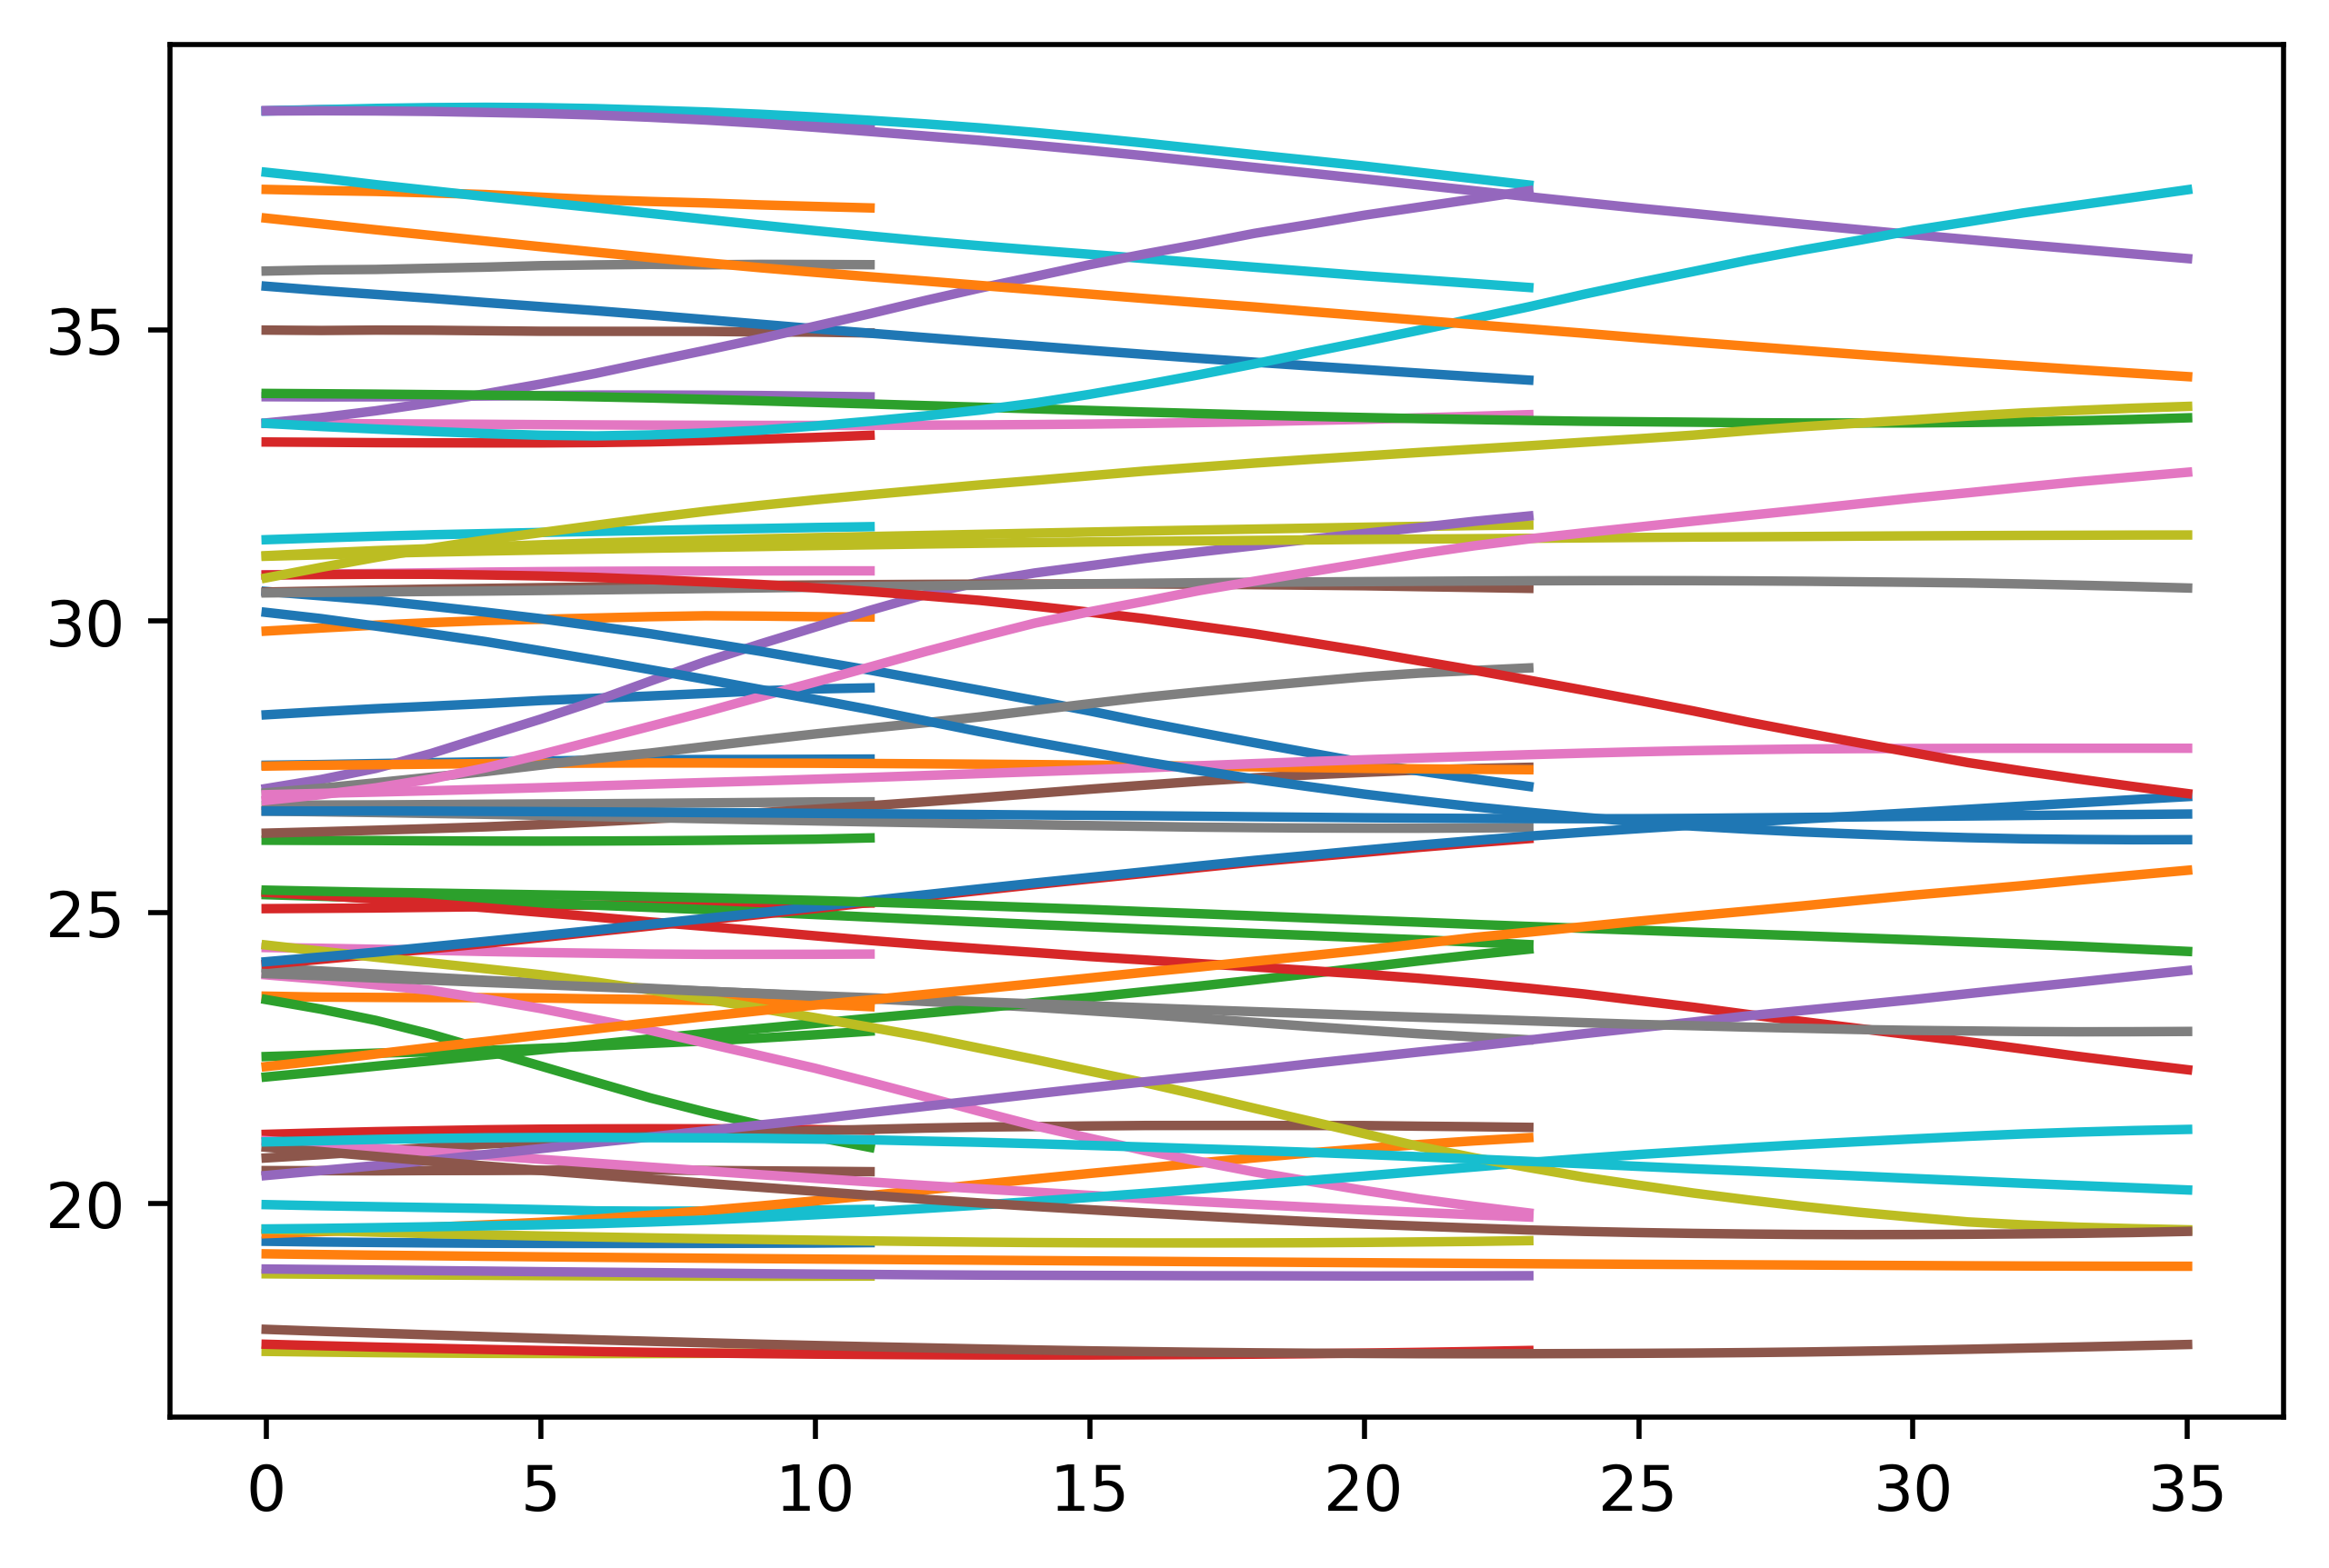

In [198]:
for i in range(len(shp_clf.shapelets_[0])):
    plt.plot(shp_clf.shapelets_[0,i])

In [196]:
from pyts.utils import windowed_view

In [64]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

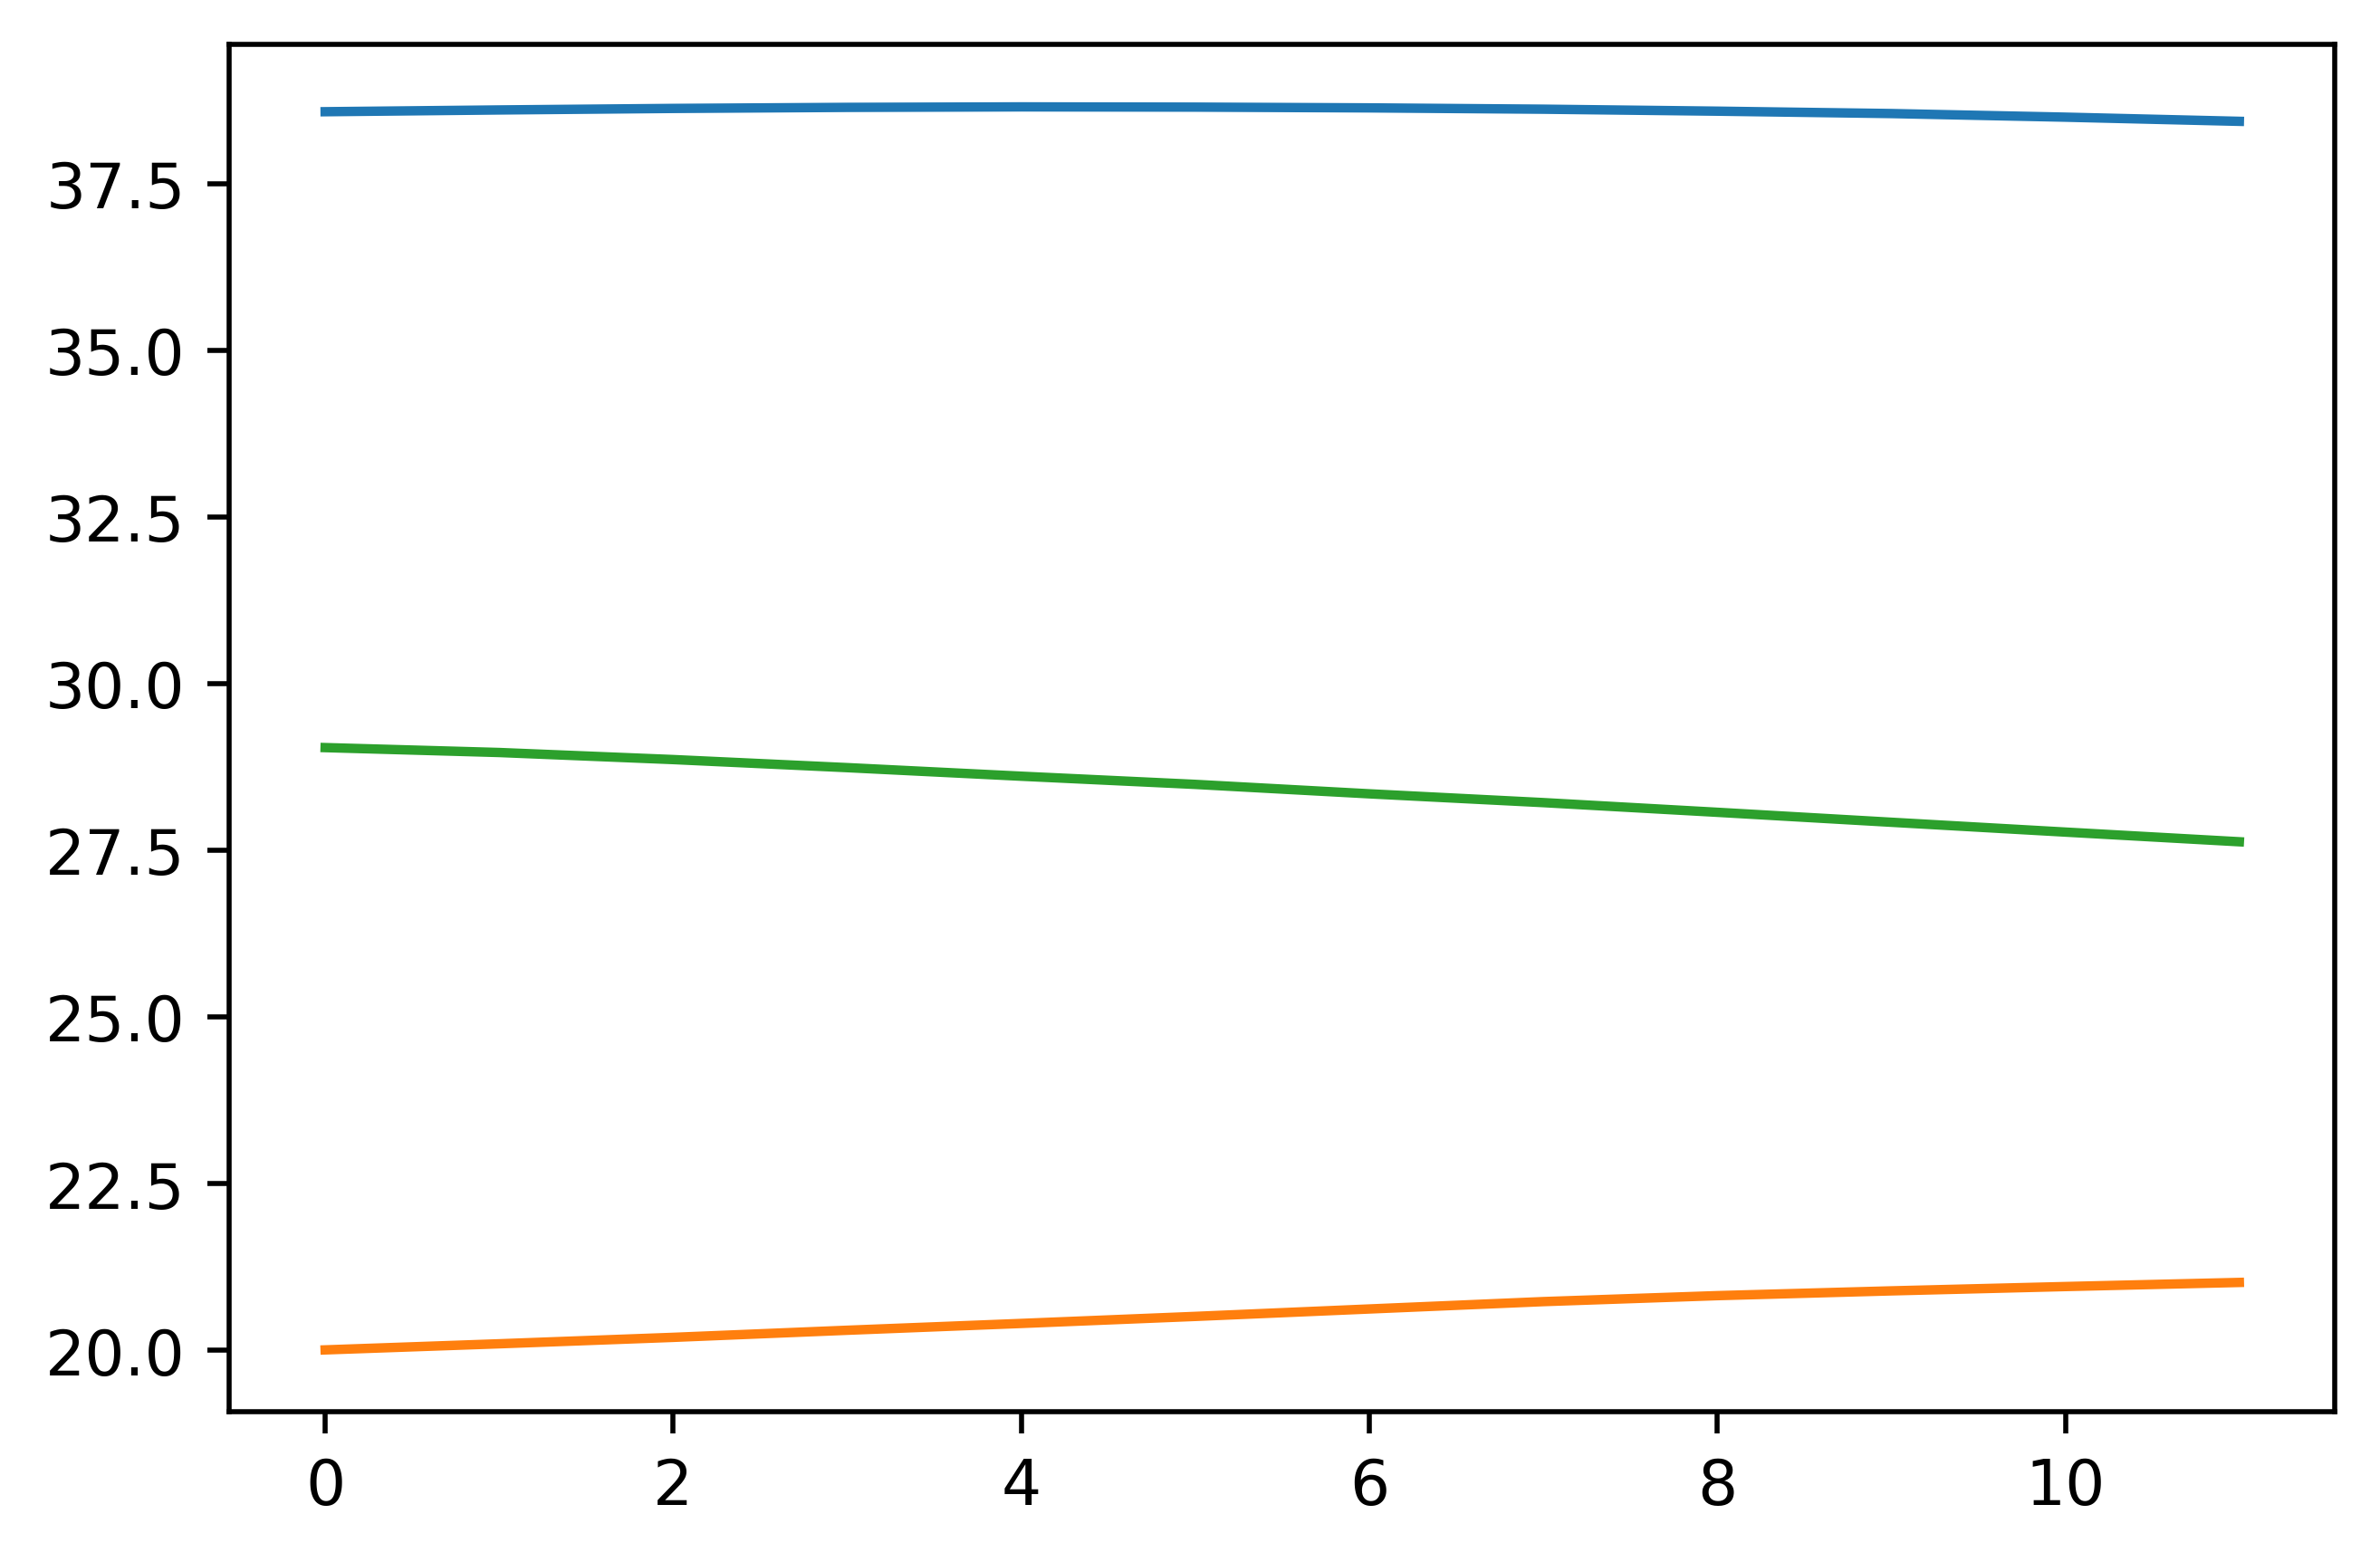

In [65]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [66]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[1]
X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 2, axis=3).min(axis=1)

In [67]:
X_dist

array([[1.75926393e+02, 4.22420342e+00, 9.55921022e+00],
       [1.08521522e+02, 1.72953107e+01, 1.41797219e-01],
       [1.73326432e+02, 3.18704902e-02, 8.77608686e+00],
       [1.73940336e+02, 4.97953890e+00, 9.12266788e+00],
       [1.07703831e+02, 8.34282772e+00, 1.36933531e-01],
       [1.42161701e+02, 1.66695984e-02, 2.99461146e+00],
       [1.75190835e+02, 4.09972580e+00, 9.37617704e+00],
       [1.05850299e+02, 1.31637936e+01, 1.78600255e-01],
       [1.40050770e+02, 1.33698001e-02, 2.72814424e+00],
       [1.74992070e+02, 4.14578151e+00, 9.31504810e+00],
       [1.06008057e+02, 1.01554126e+01, 1.64000389e-01],
       [1.32171664e+02, 1.27331569e-02, 1.72640599e+00],
       [3.04357070e+02, 2.02380009e-01, 5.26035416e+01],
       [2.92638612e+02, 2.82220368e-02, 4.78442254e+01],
       [2.83703179e+02, 3.07897308e-01, 4.42273148e+01],
       [3.04457827e+02, 2.08622721e-01, 5.26179289e+01],
       [3.00161850e+02, 4.15136968e-02, 5.09395607e+01],
       [2.86082220e+02, 4.37200

In [68]:
np.mean(X_dist[y == 0], axis=0)

array([128.17069576,  38.6863755 ,  14.2455895 ])

In [69]:
np.mean(X_dist[y == 1], axis=0)

array([164.87323268,  17.85311852,  26.09692785])

In [70]:
np.mean(X_dist[y == 2], axis=0)

array([205.32162643,  23.91155621,  29.31122818])

# Matrix Profile

https://github.com/target/matrixprofile-ts

https://github.com/TDAmeritrade/stumpy

In [71]:
from matrixprofile import *

In [74]:


df = pd.read_csv(r'../../data/temperatureTS.csv',squeeze=True, header = None, index_col=0)


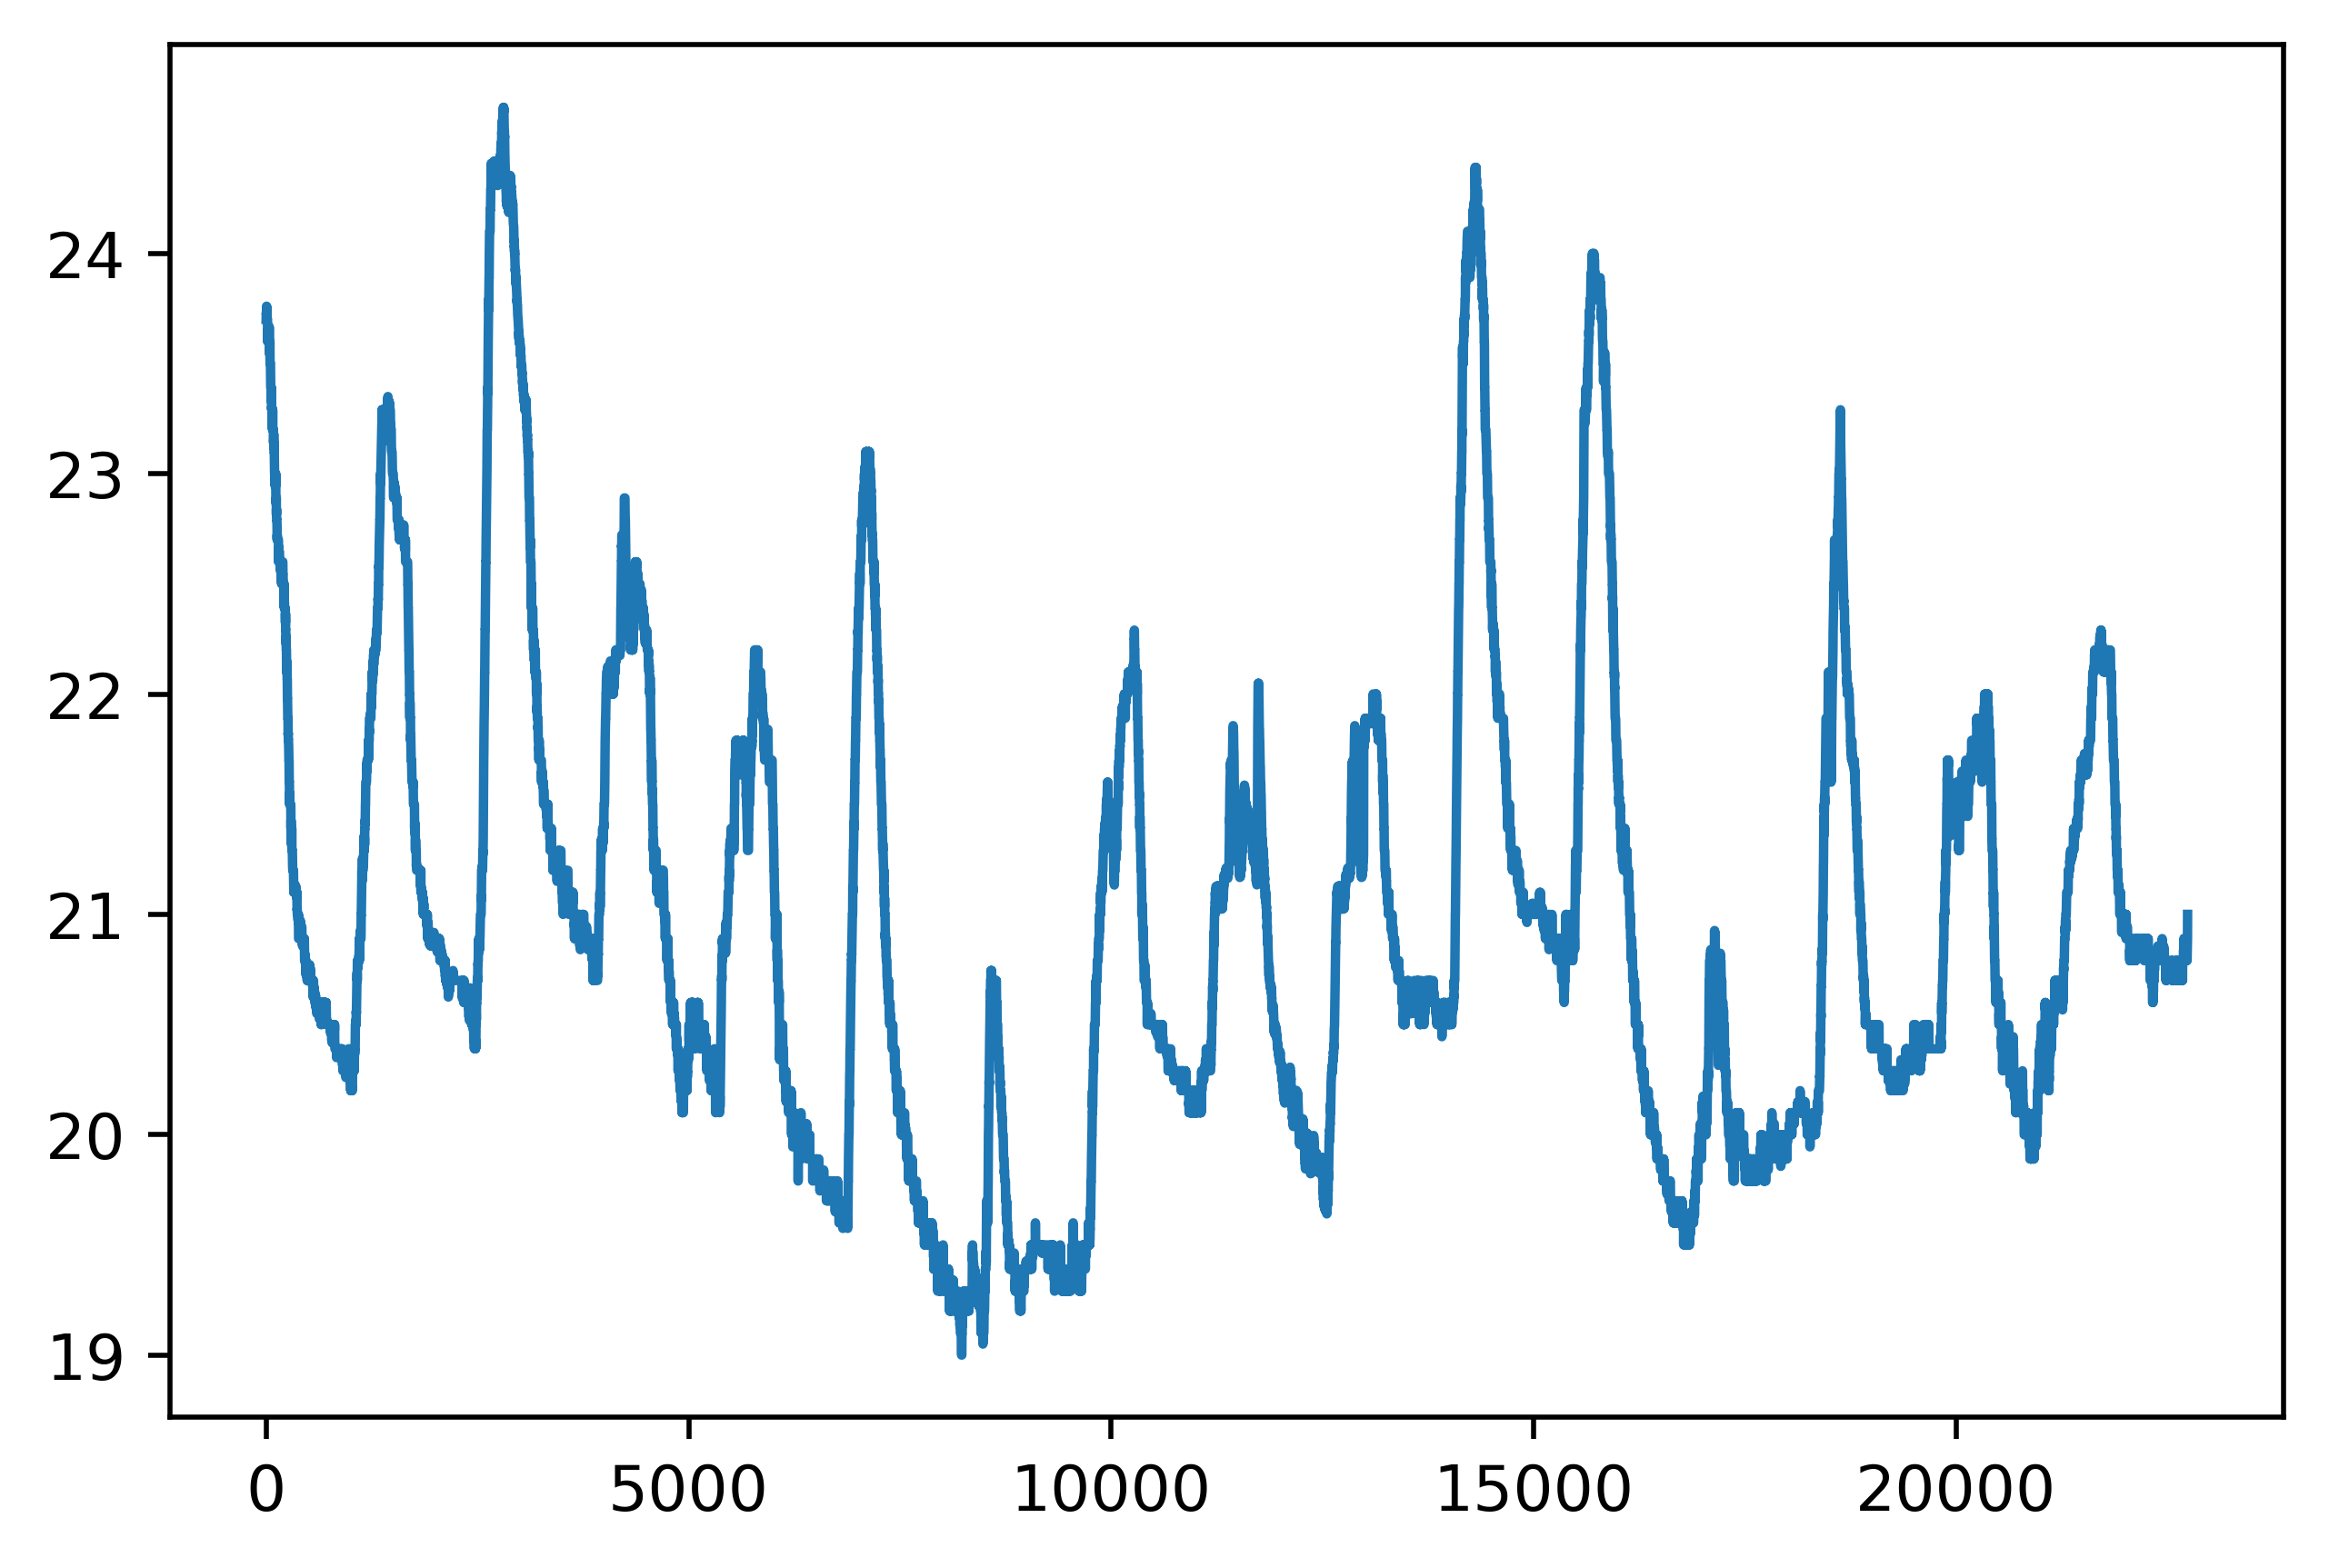

In [75]:
ts = df.values
plt.plot(ts)

C:\Users\carlo\Anaconda3\lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: divide by zero encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\carlo\Anaconda3\lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: invalid value encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\carlo\Anaconda3\lib\site-packages\matrixprofile\utils.py:200: RuntimeWarning: divide by zero encountered in true_divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))
C:\Users\carlo\Anaconda3\lib\site-packages\matrixprofile\utils.py:200: RuntimeWarning: invalid value encountered in true_divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))


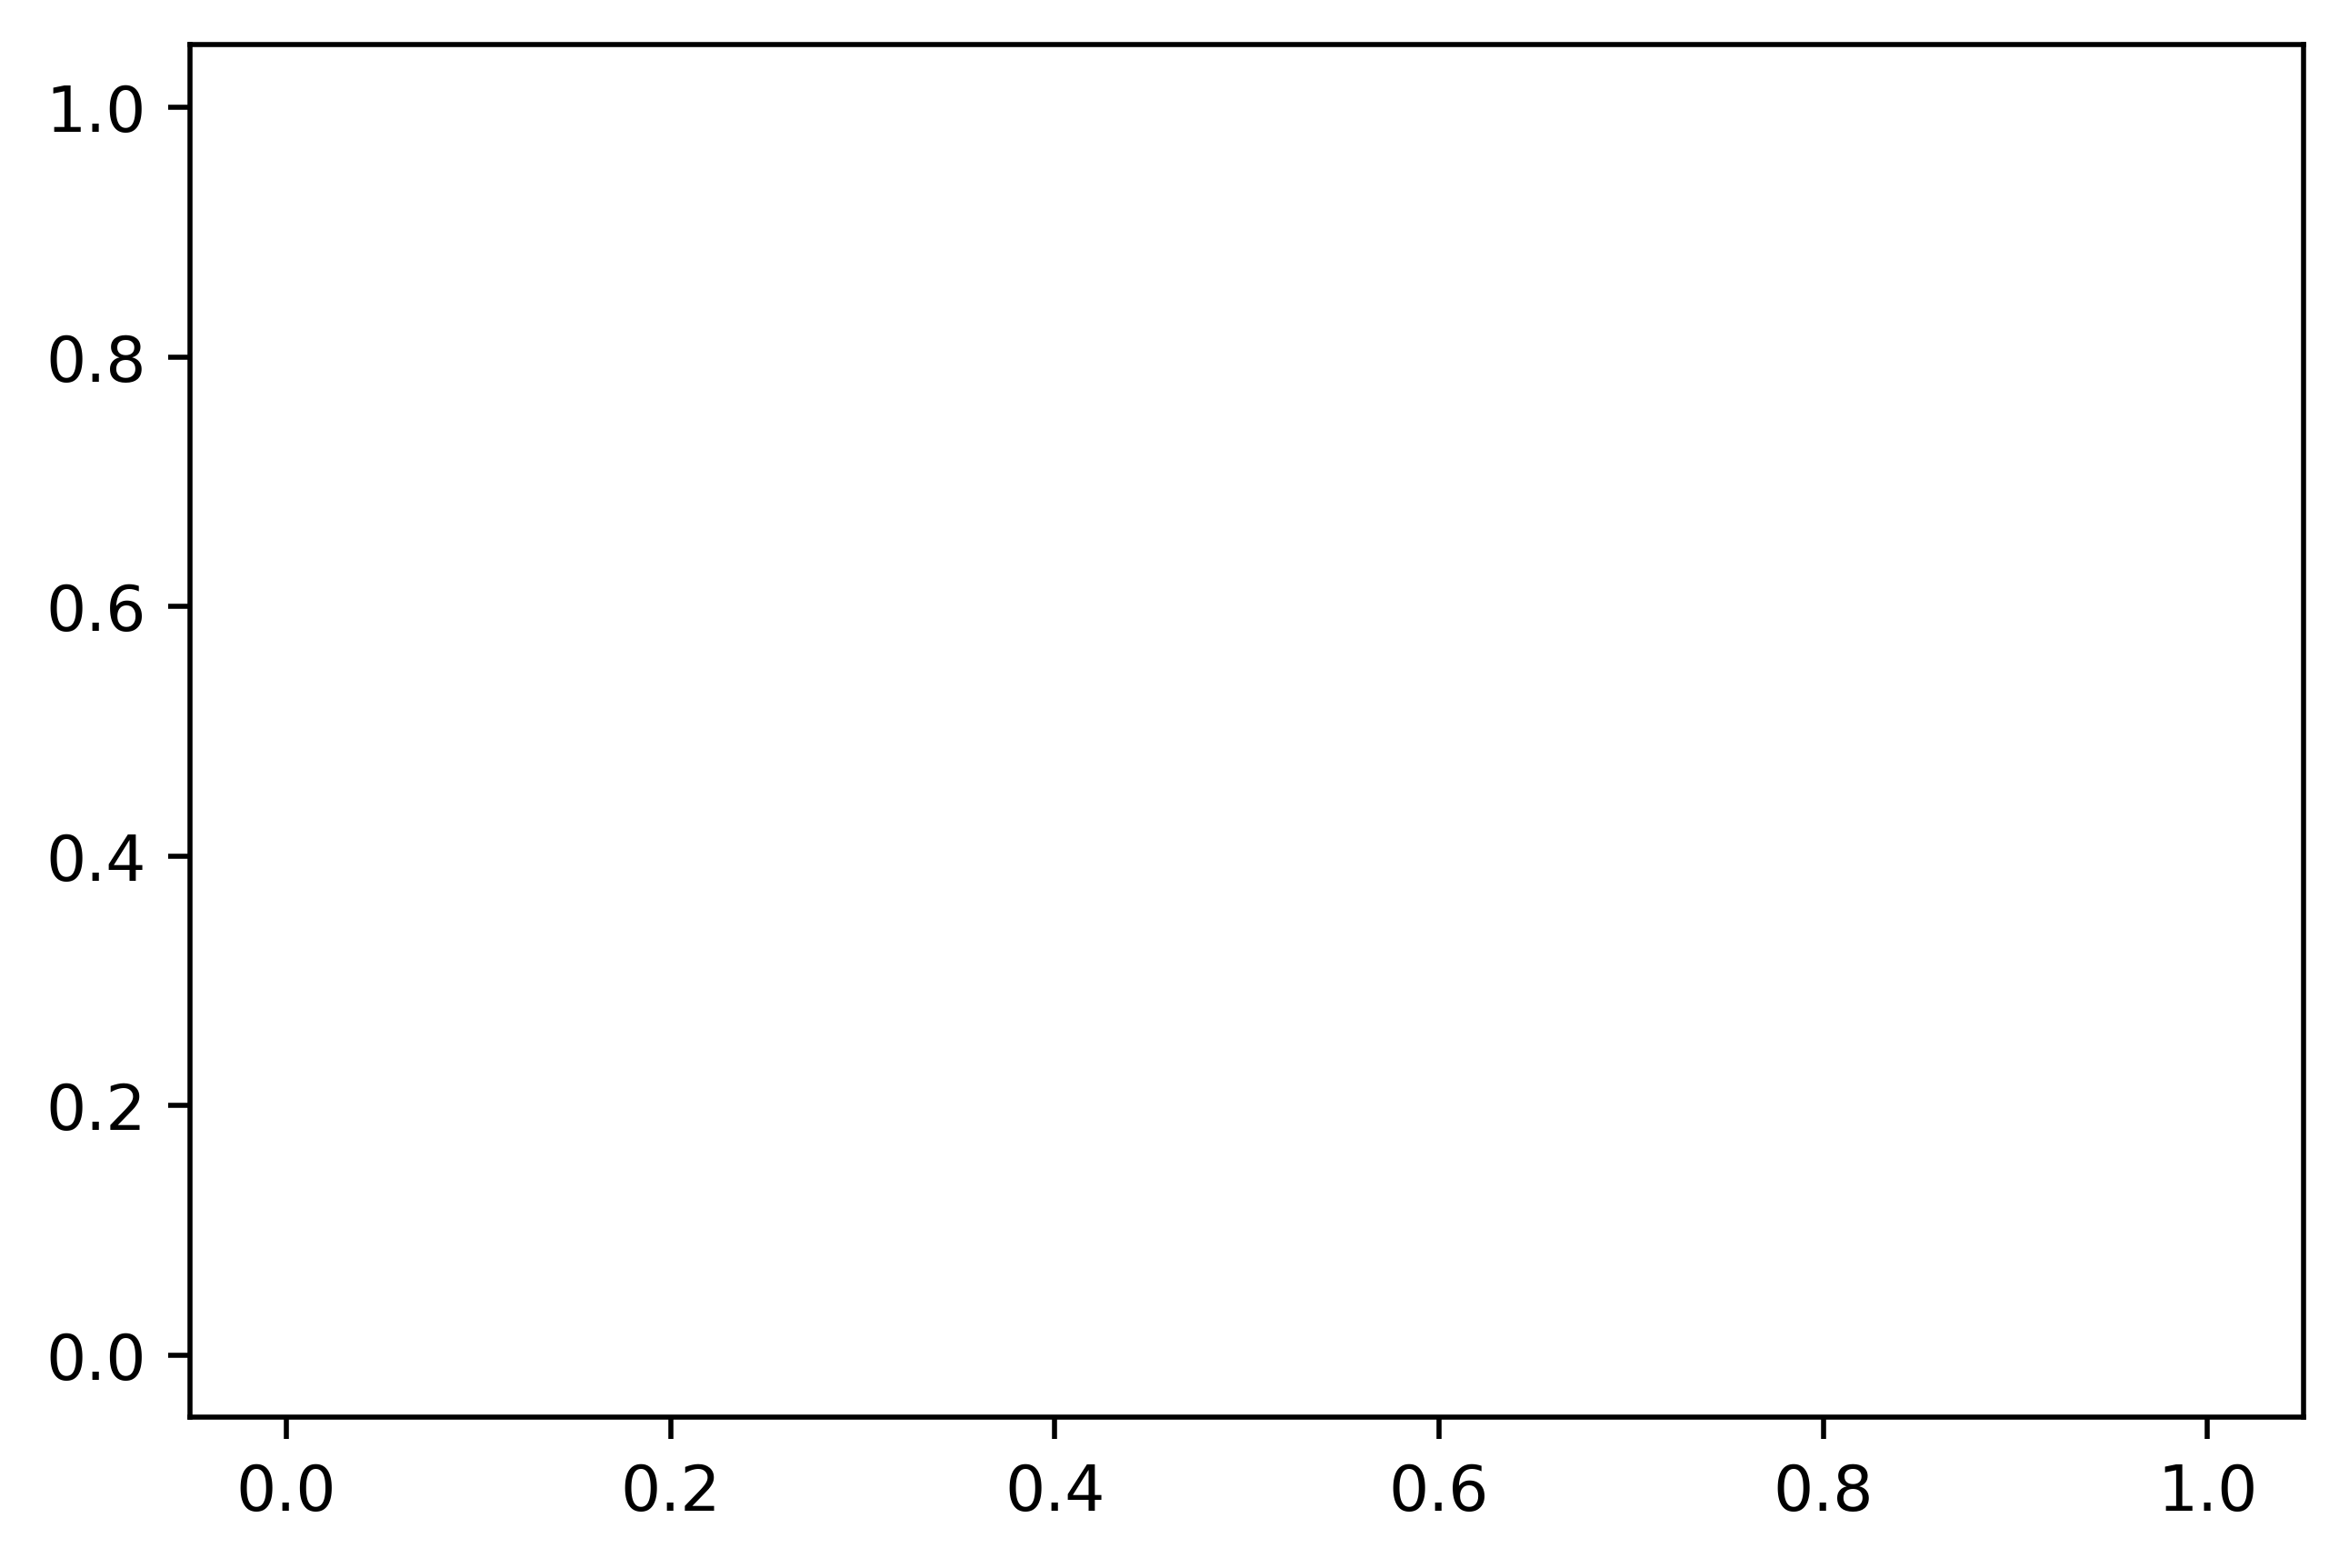

In [78]:
w = 12
mp, mpi = matrixProfile.stomp(ts, w)

plt.plot(mp)
plt.show()

window = 12
ts_log_mov_diff = pd.Series(np.log(ts) - np.log(ts).rolling(window, center=False).mean(), index=ts.index)

plt.plot(ts_log_mov_diff)
plt.show()

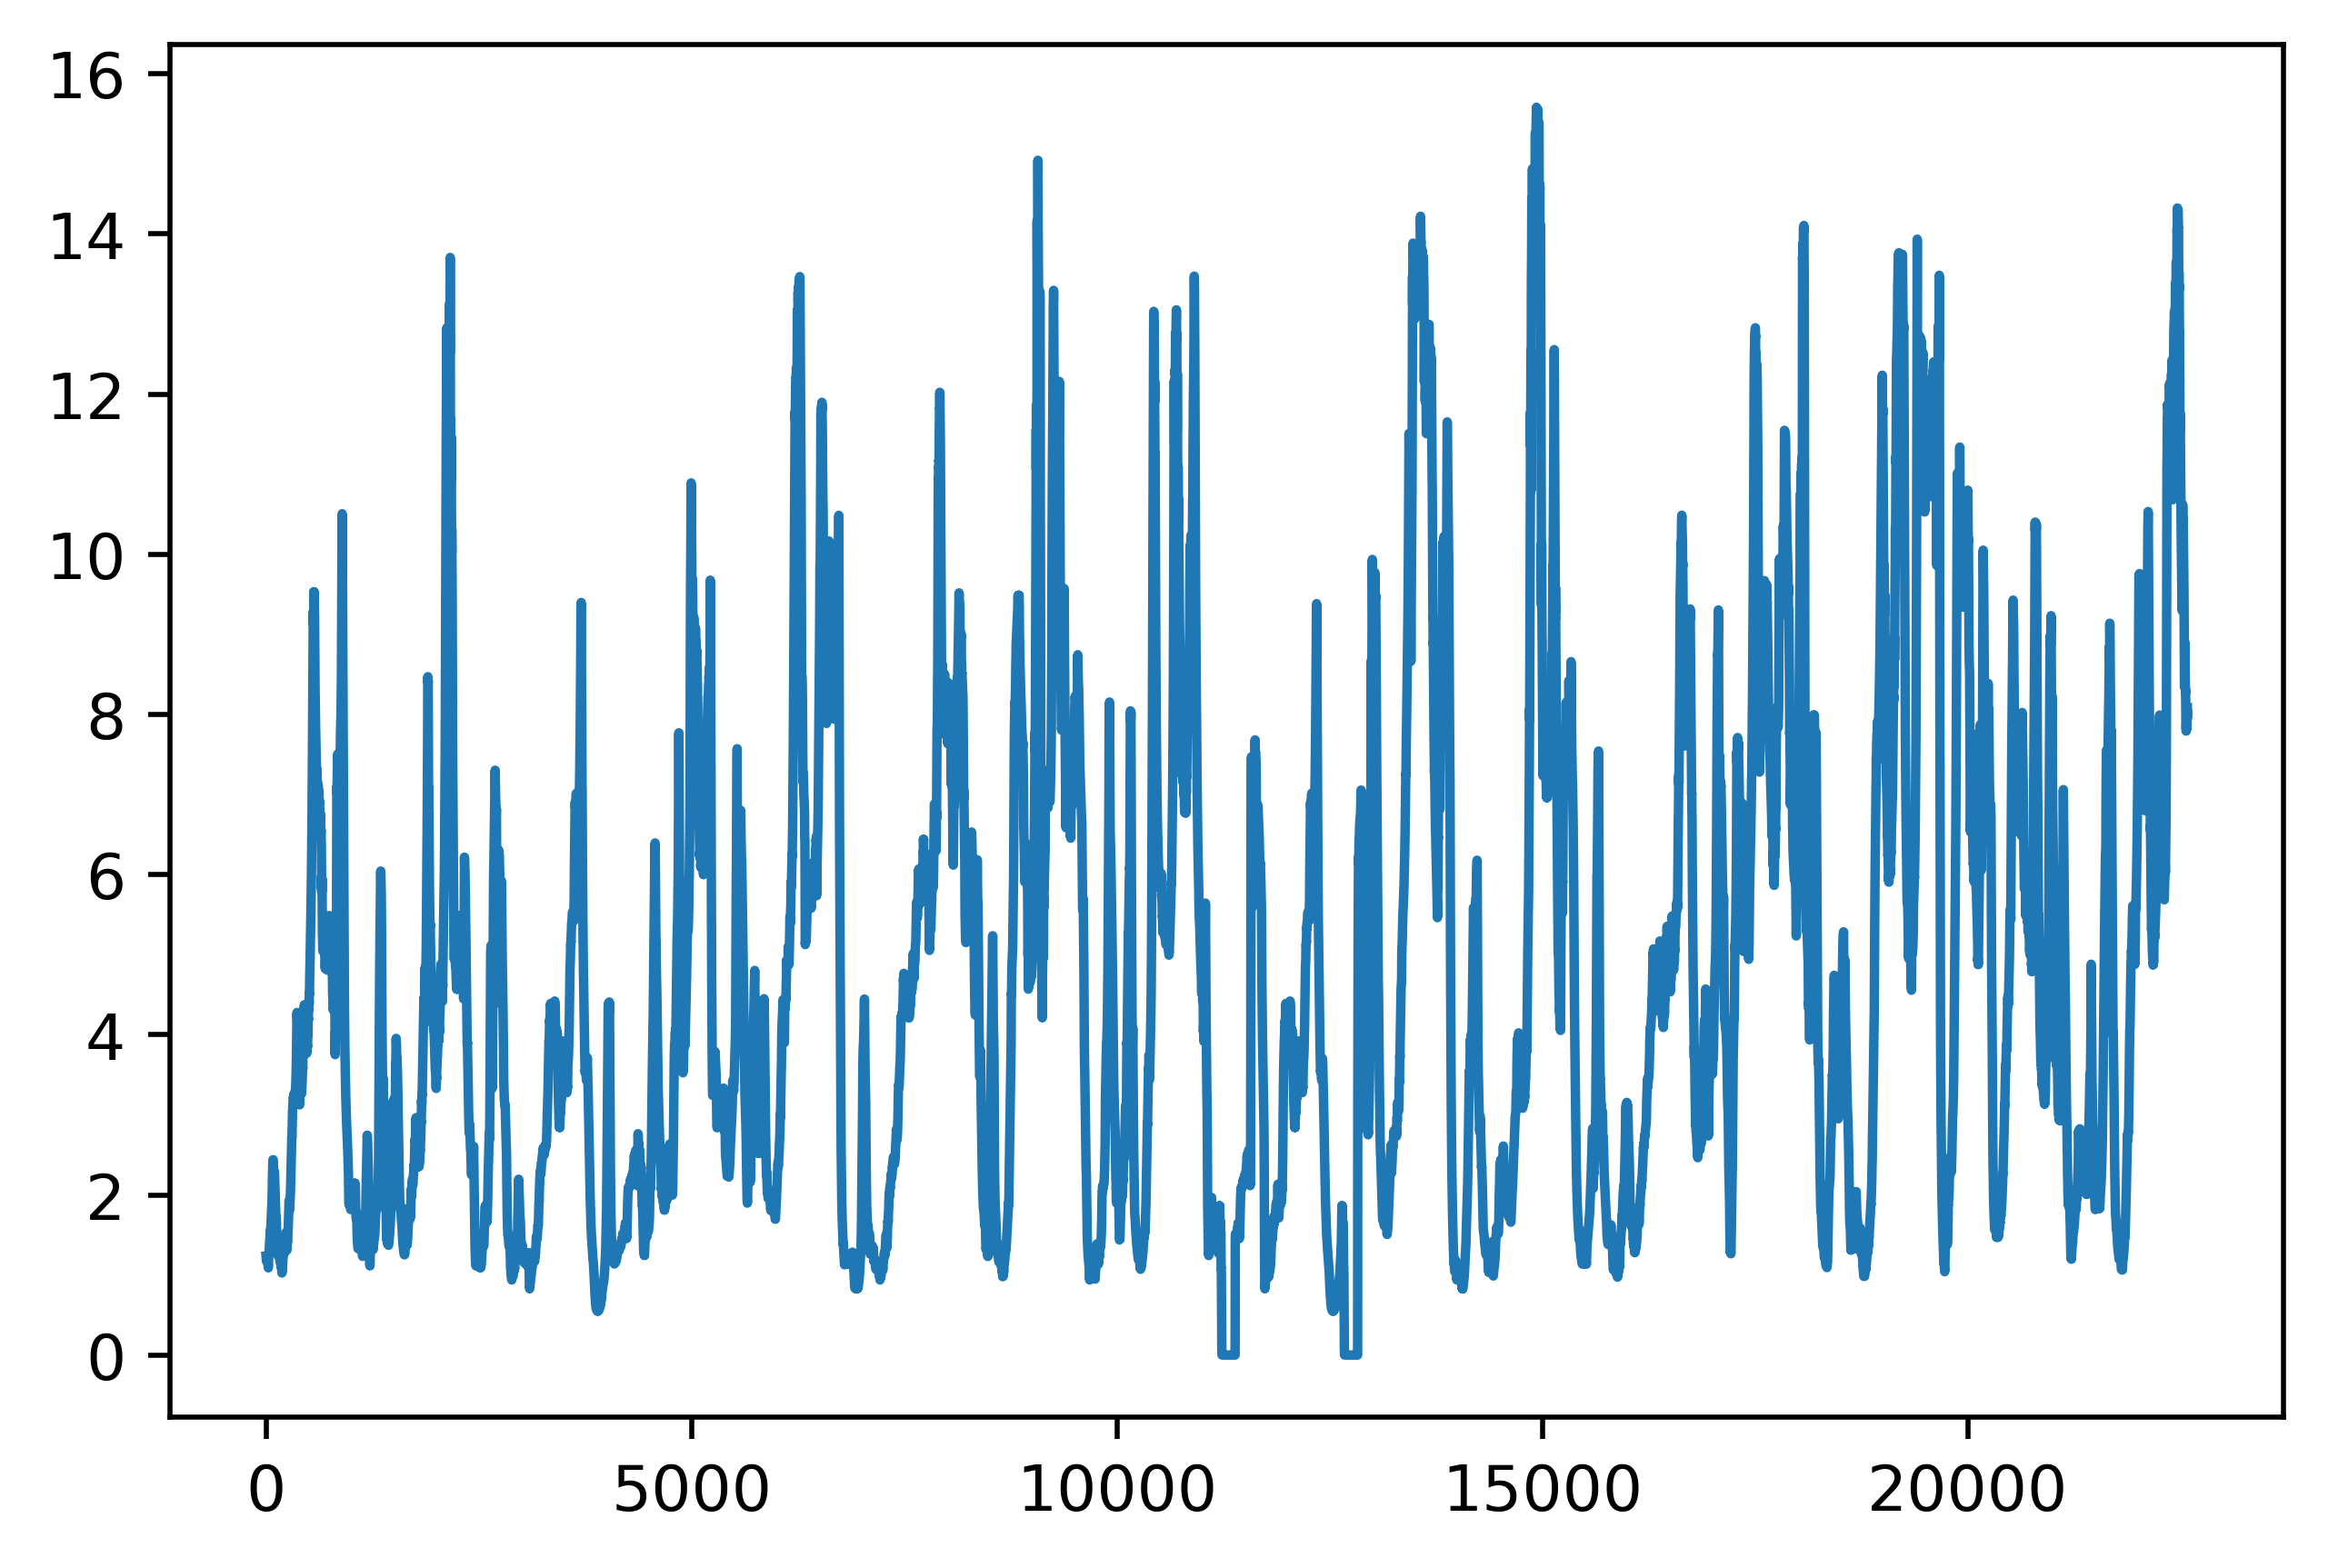

In [160]:
w = 160
mp, mpi = matrixProfile.stomp(ts, w)

plt.plot(mp)
plt.show()

# Motif Discovery

In [178]:
#### mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(ts, (mp, mpi), ex_zone=180, max_motifs=6)

Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

In [179]:
mo

[[11254, 12694],
 [3871, 12513],
 [1144, 6949, 9744, 14064, 15518],
 [2915, 3098, 11739, 14398, 15908, 18639],
 [20, 201, 7216, 8663, 10273, 16089, 17207, 21804]]

In [180]:
mod

[0.0002705926146552686,
 0.6615996421567781,
 0.8262014130255892,
 0.827369294407339,
 0.9380485021516081]

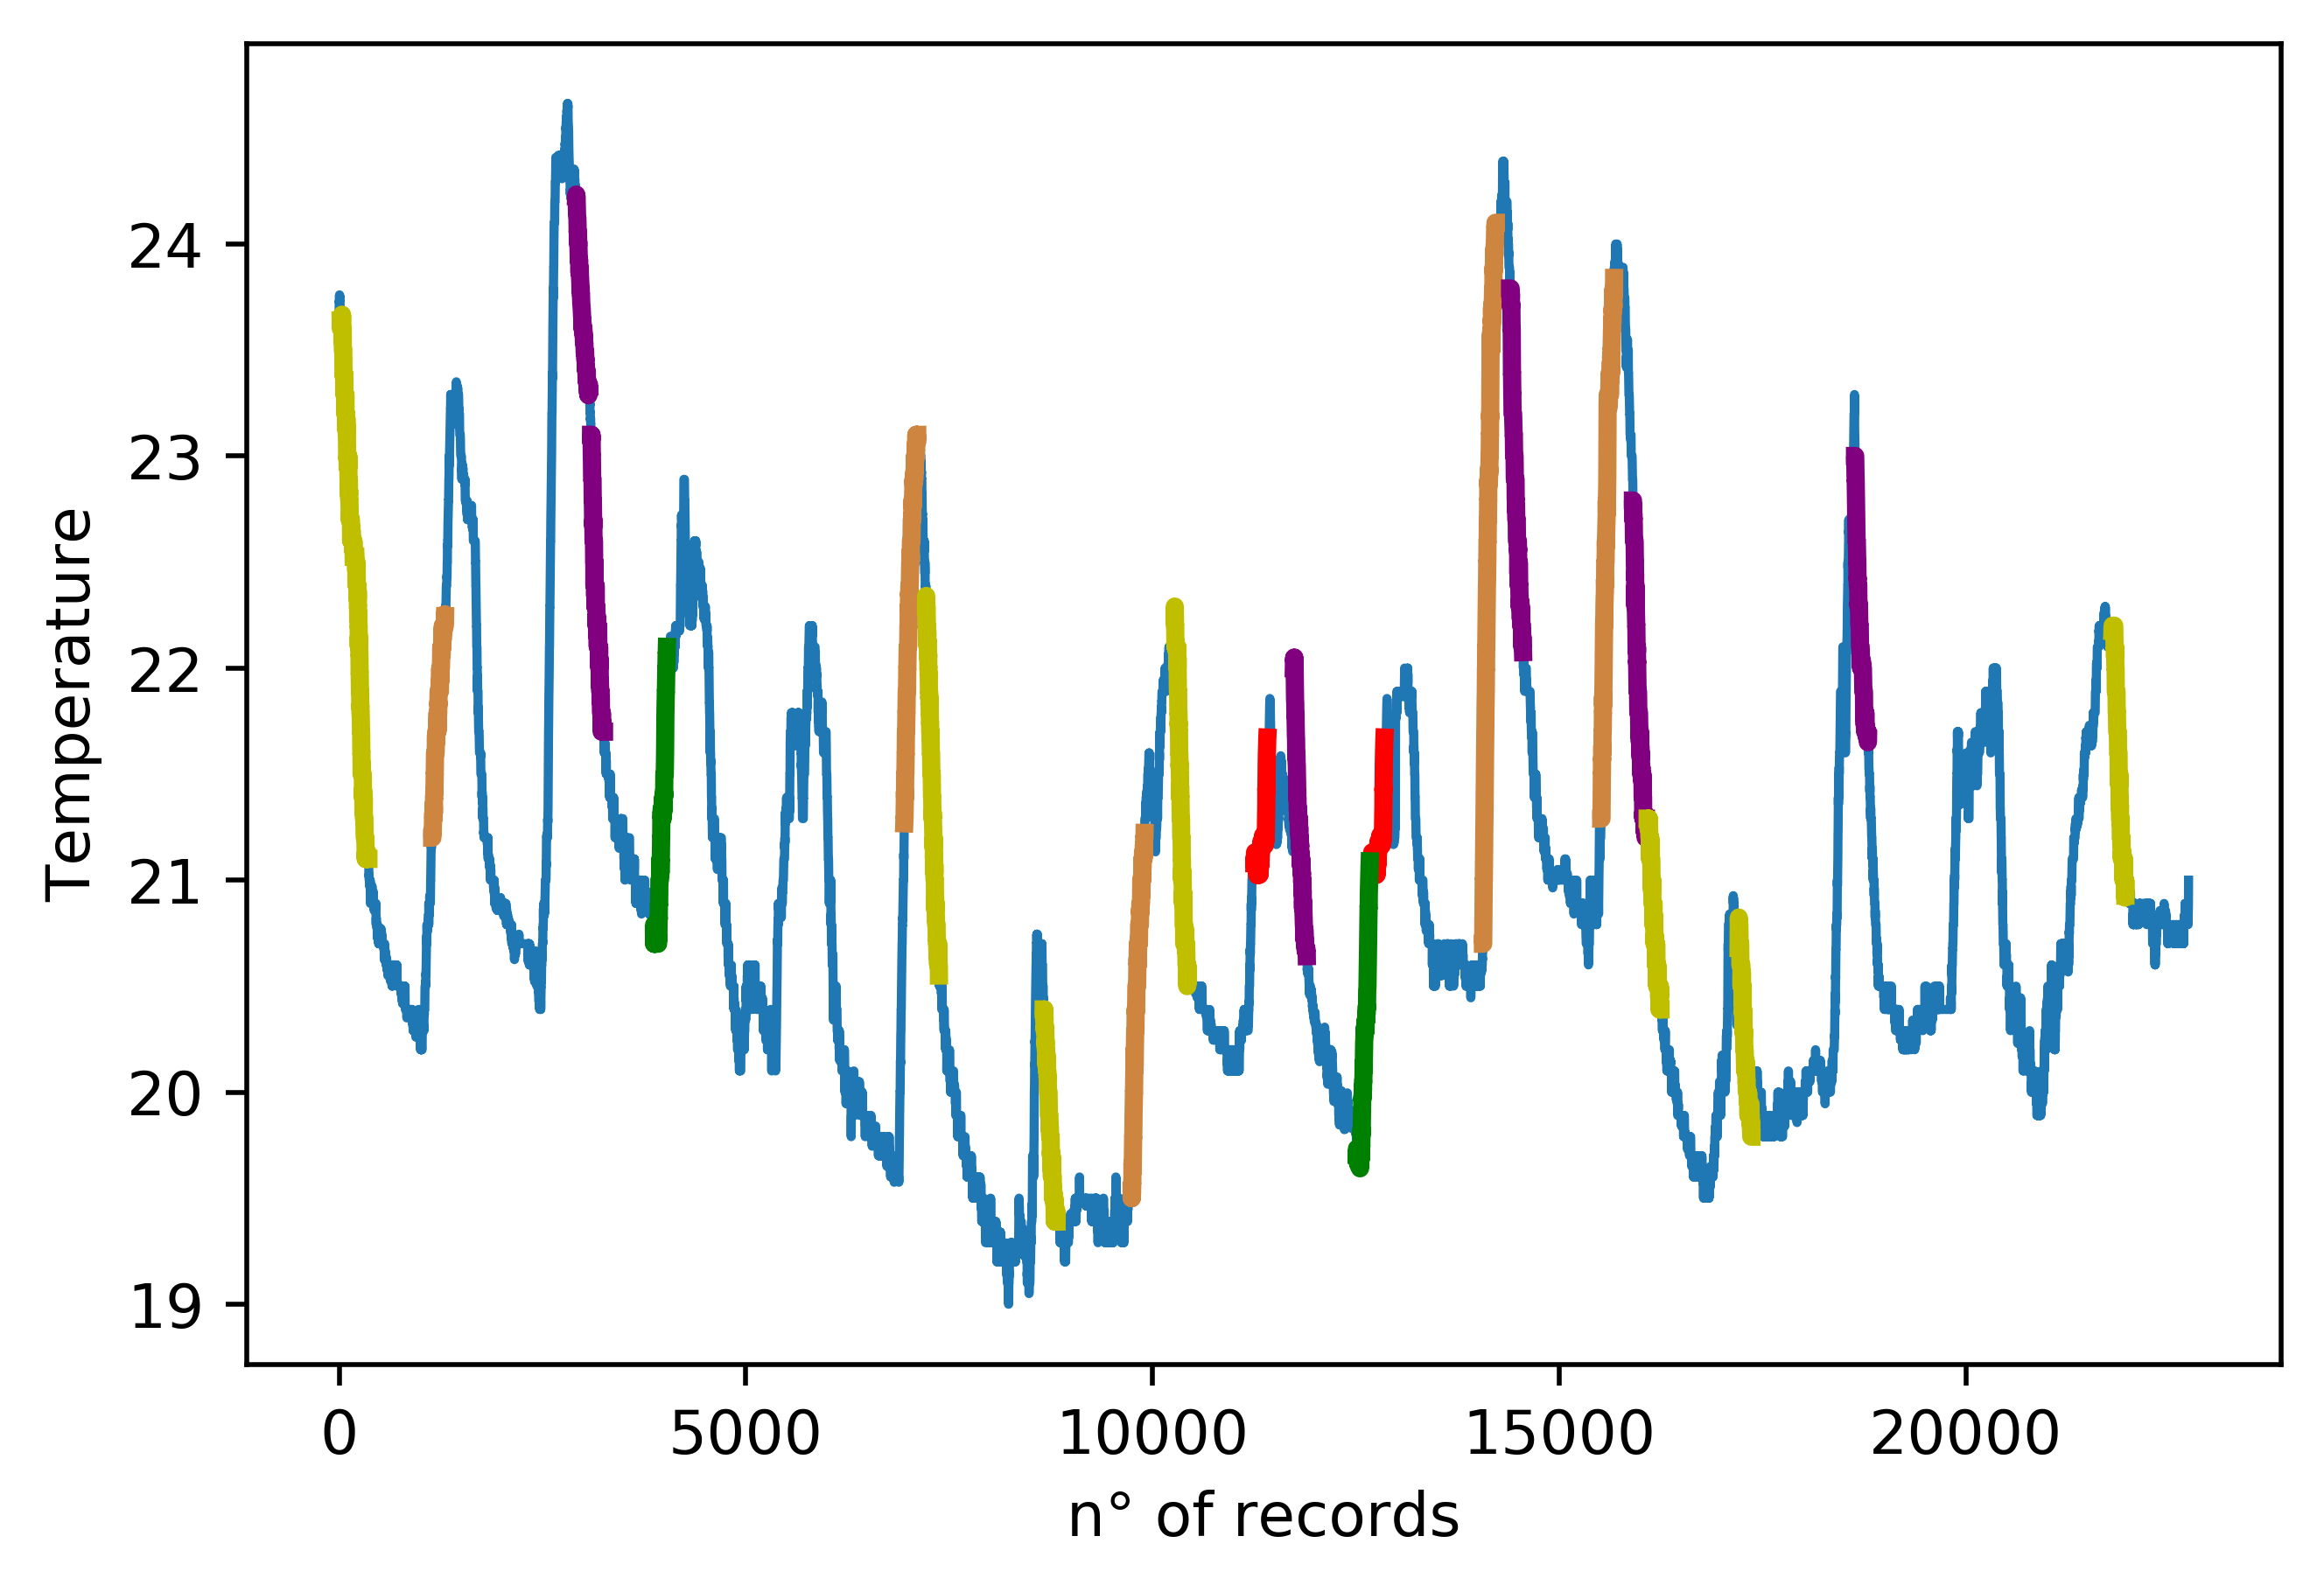

In [182]:
plt.plot(ts)
colors = ['r', 'g', 'peru', 'purple', 'y','k','grey'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        
        
plt.ylabel('Temperature')
plt.xlabel('n° of records')
plt.show()

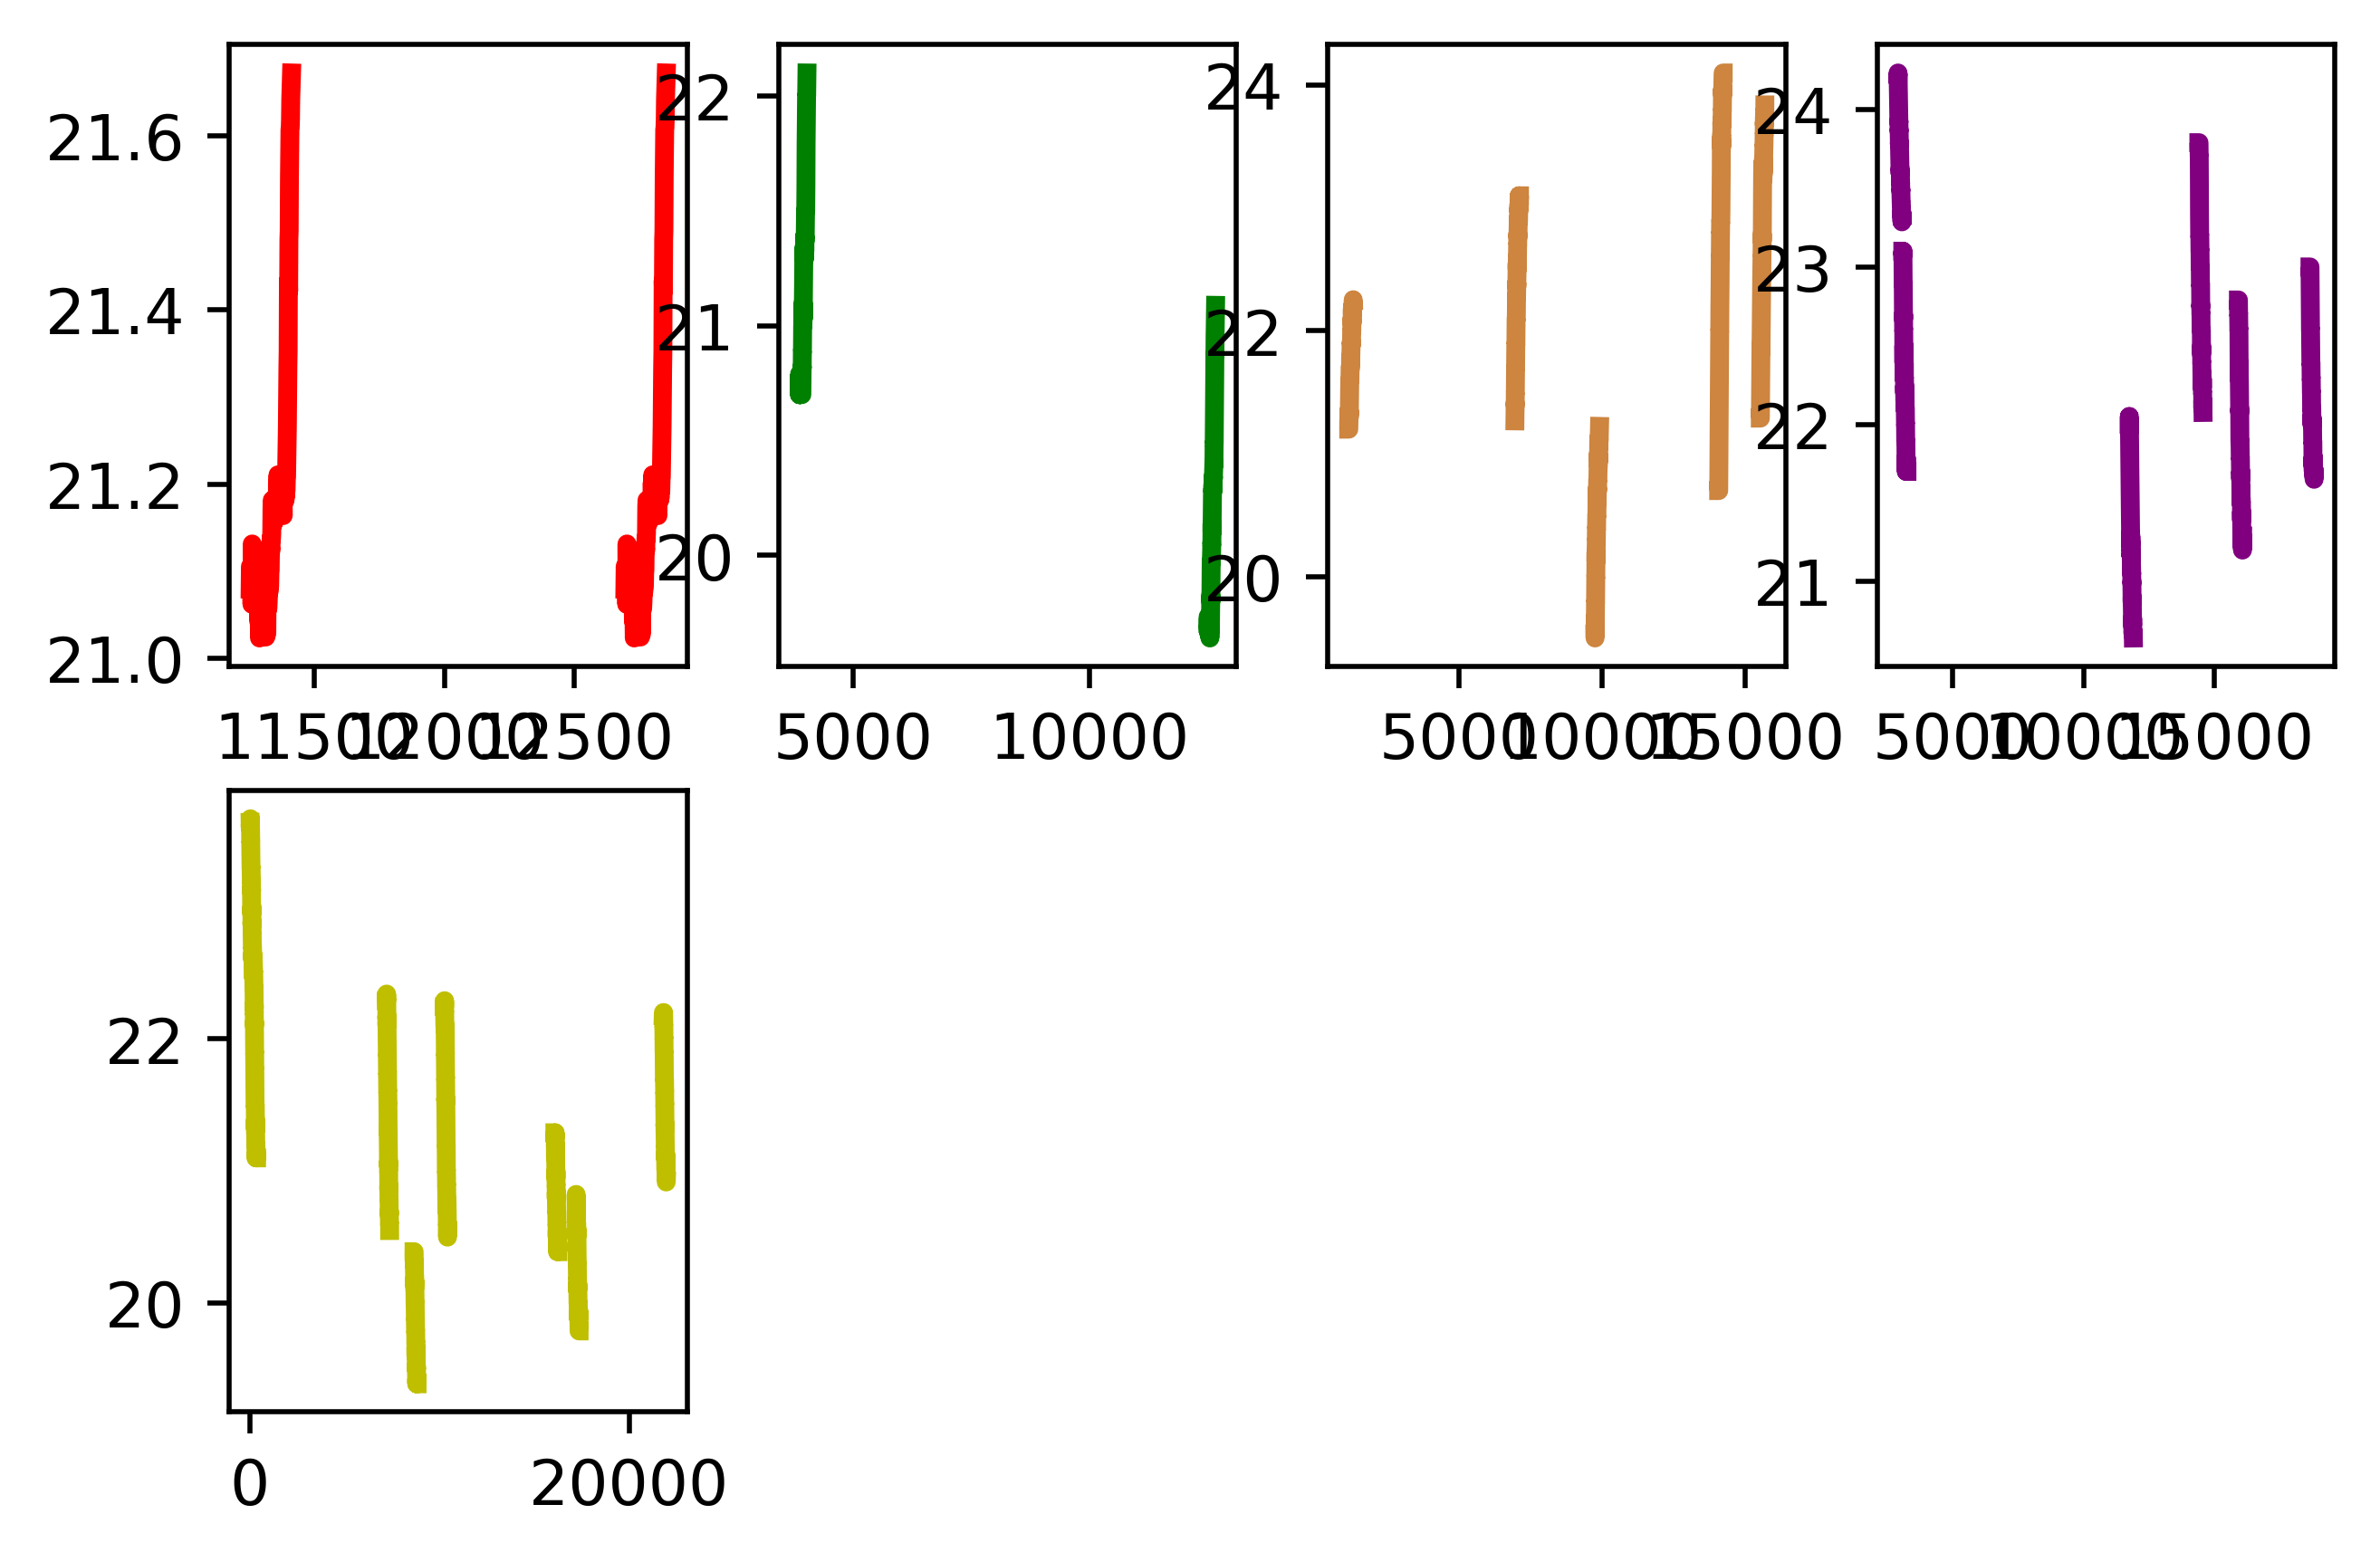

In [183]:
j=1
for m, d, c in zip(mo, mod, colors):
    plt.subplot(2,4,j)
    j+=1
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
plt.show()

# Anomaly Discovery

In [104]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord    

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

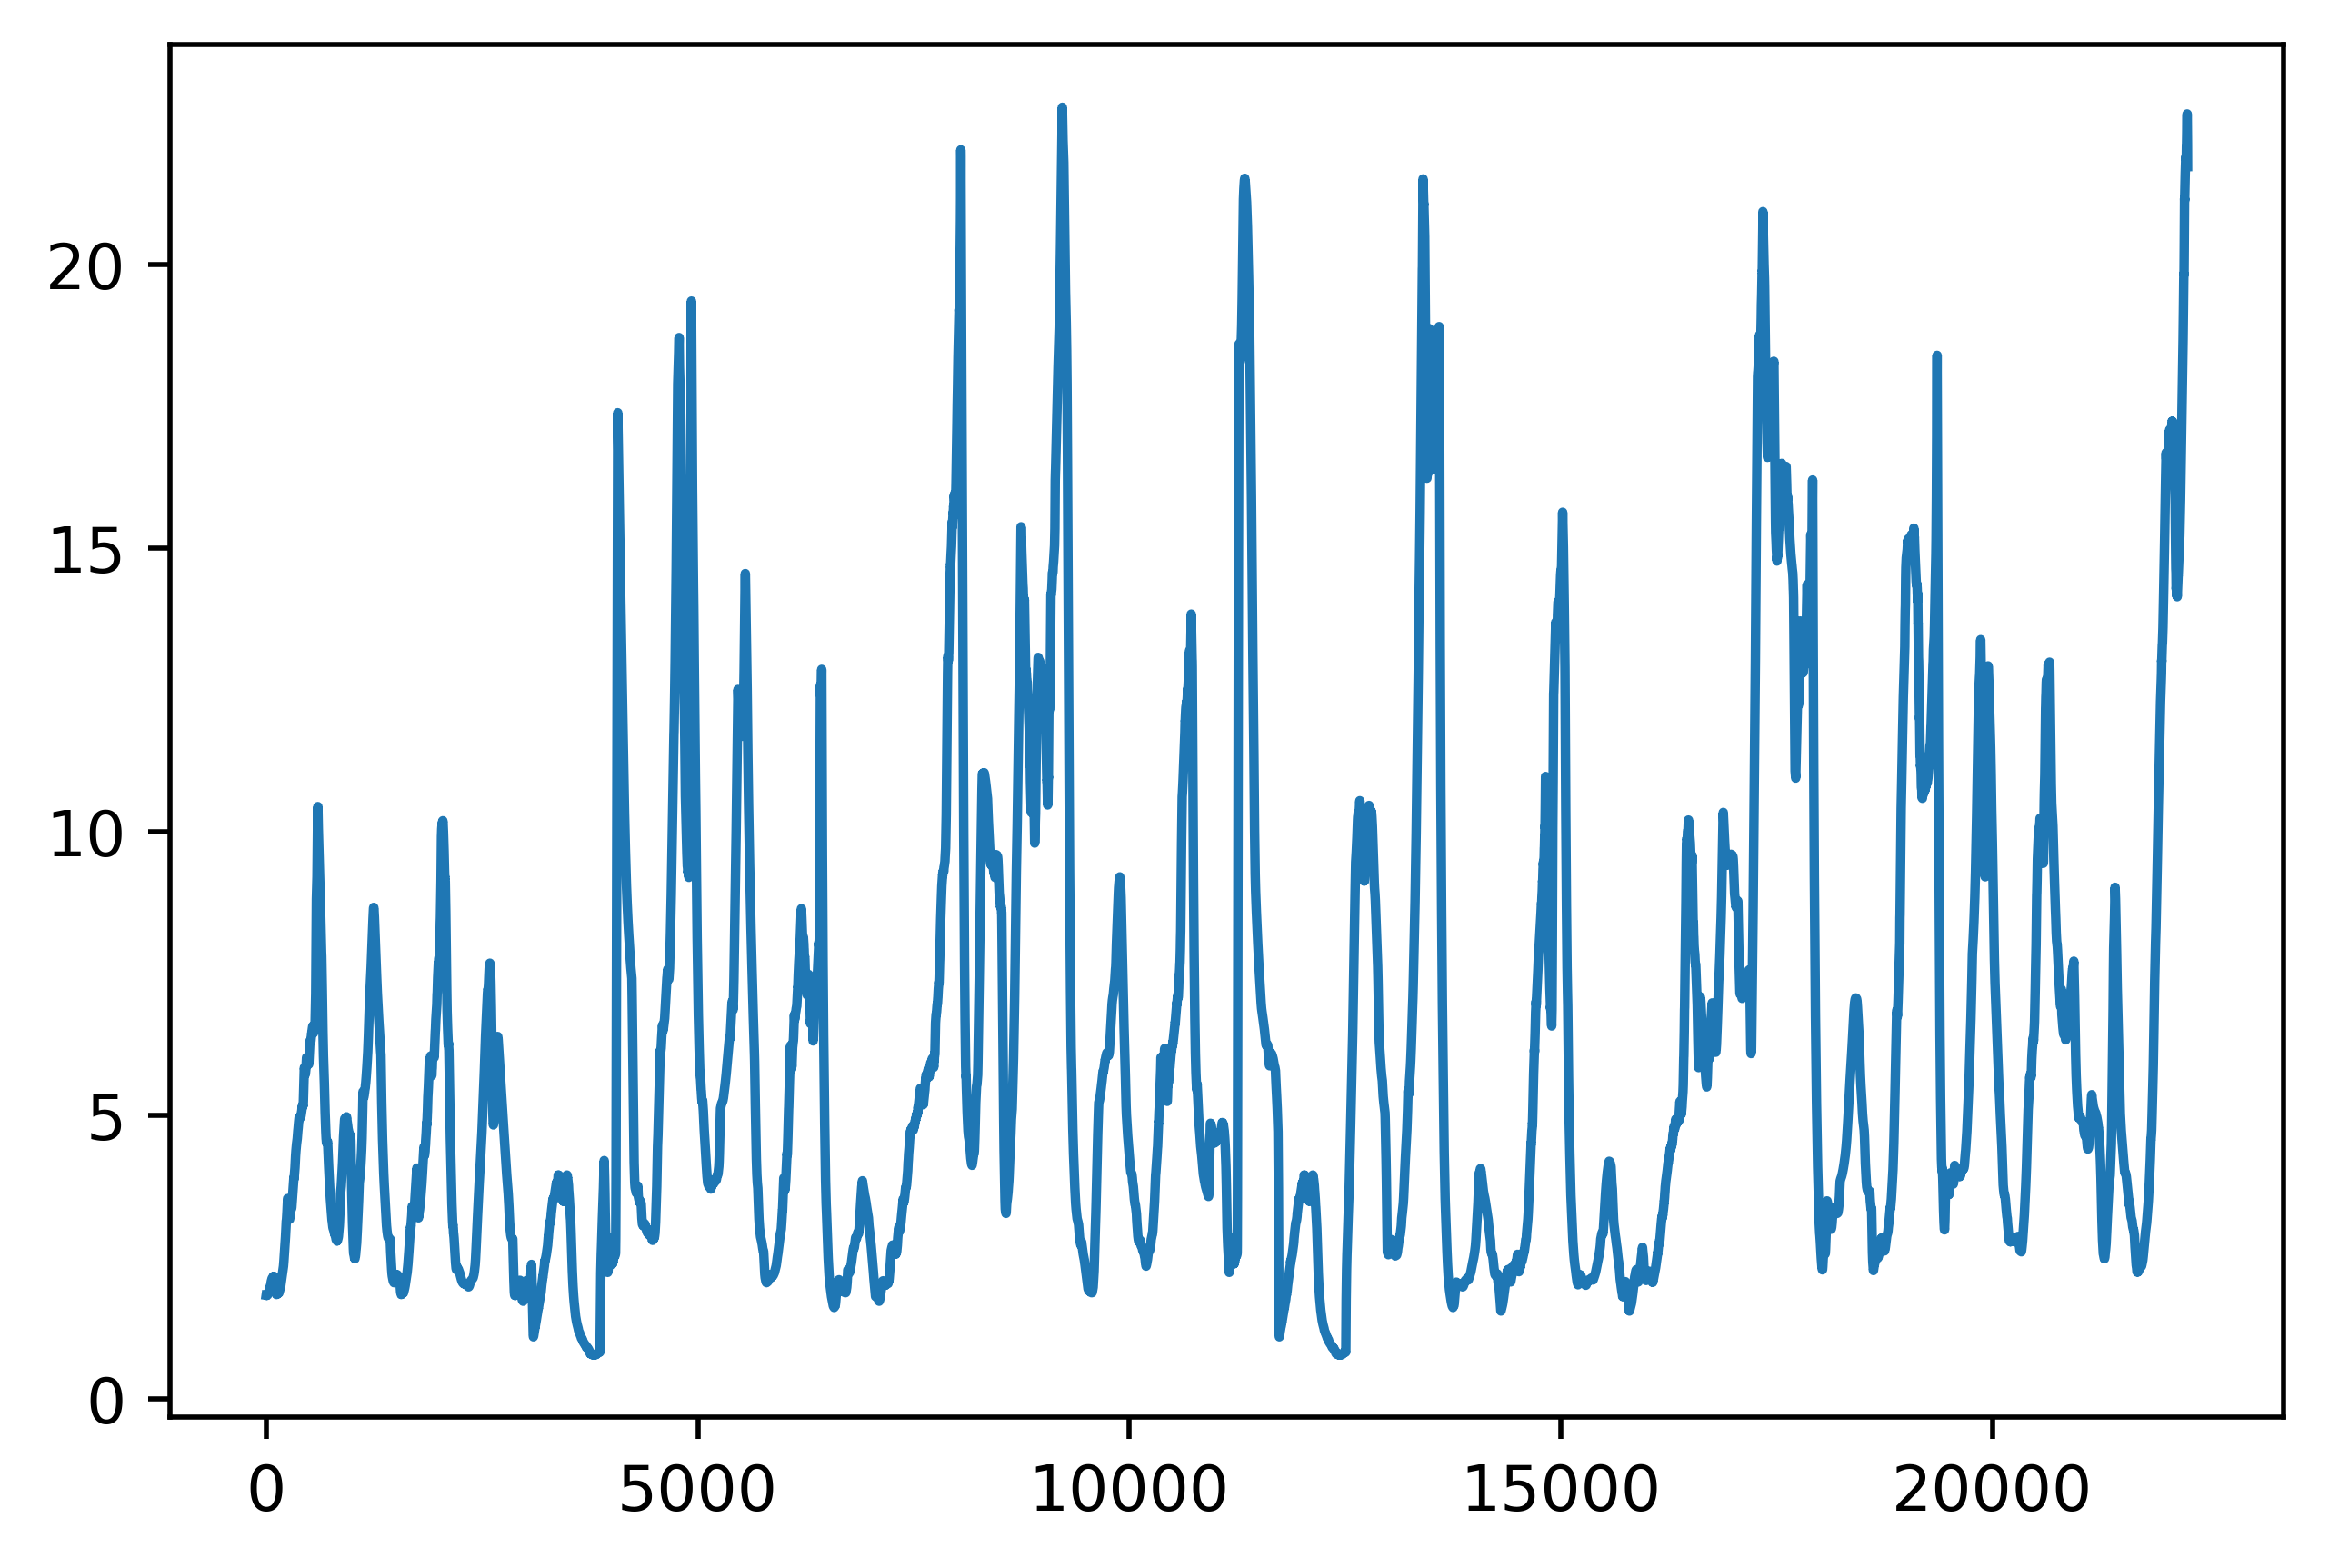

In [106]:
w = 480
mp, mpi = matrixProfile.stomp(ts, w)

plt.plot(mp)
plt.show()

In [156]:
k = 13
anoms = discords(mp, ex_zone=360, k=k)

In [157]:
anoms

array([ 9224, 22256,  8048, 11338, 13404, 17341,  4927, 19359,  4073,
       17917, 15021,  8746, 18998])

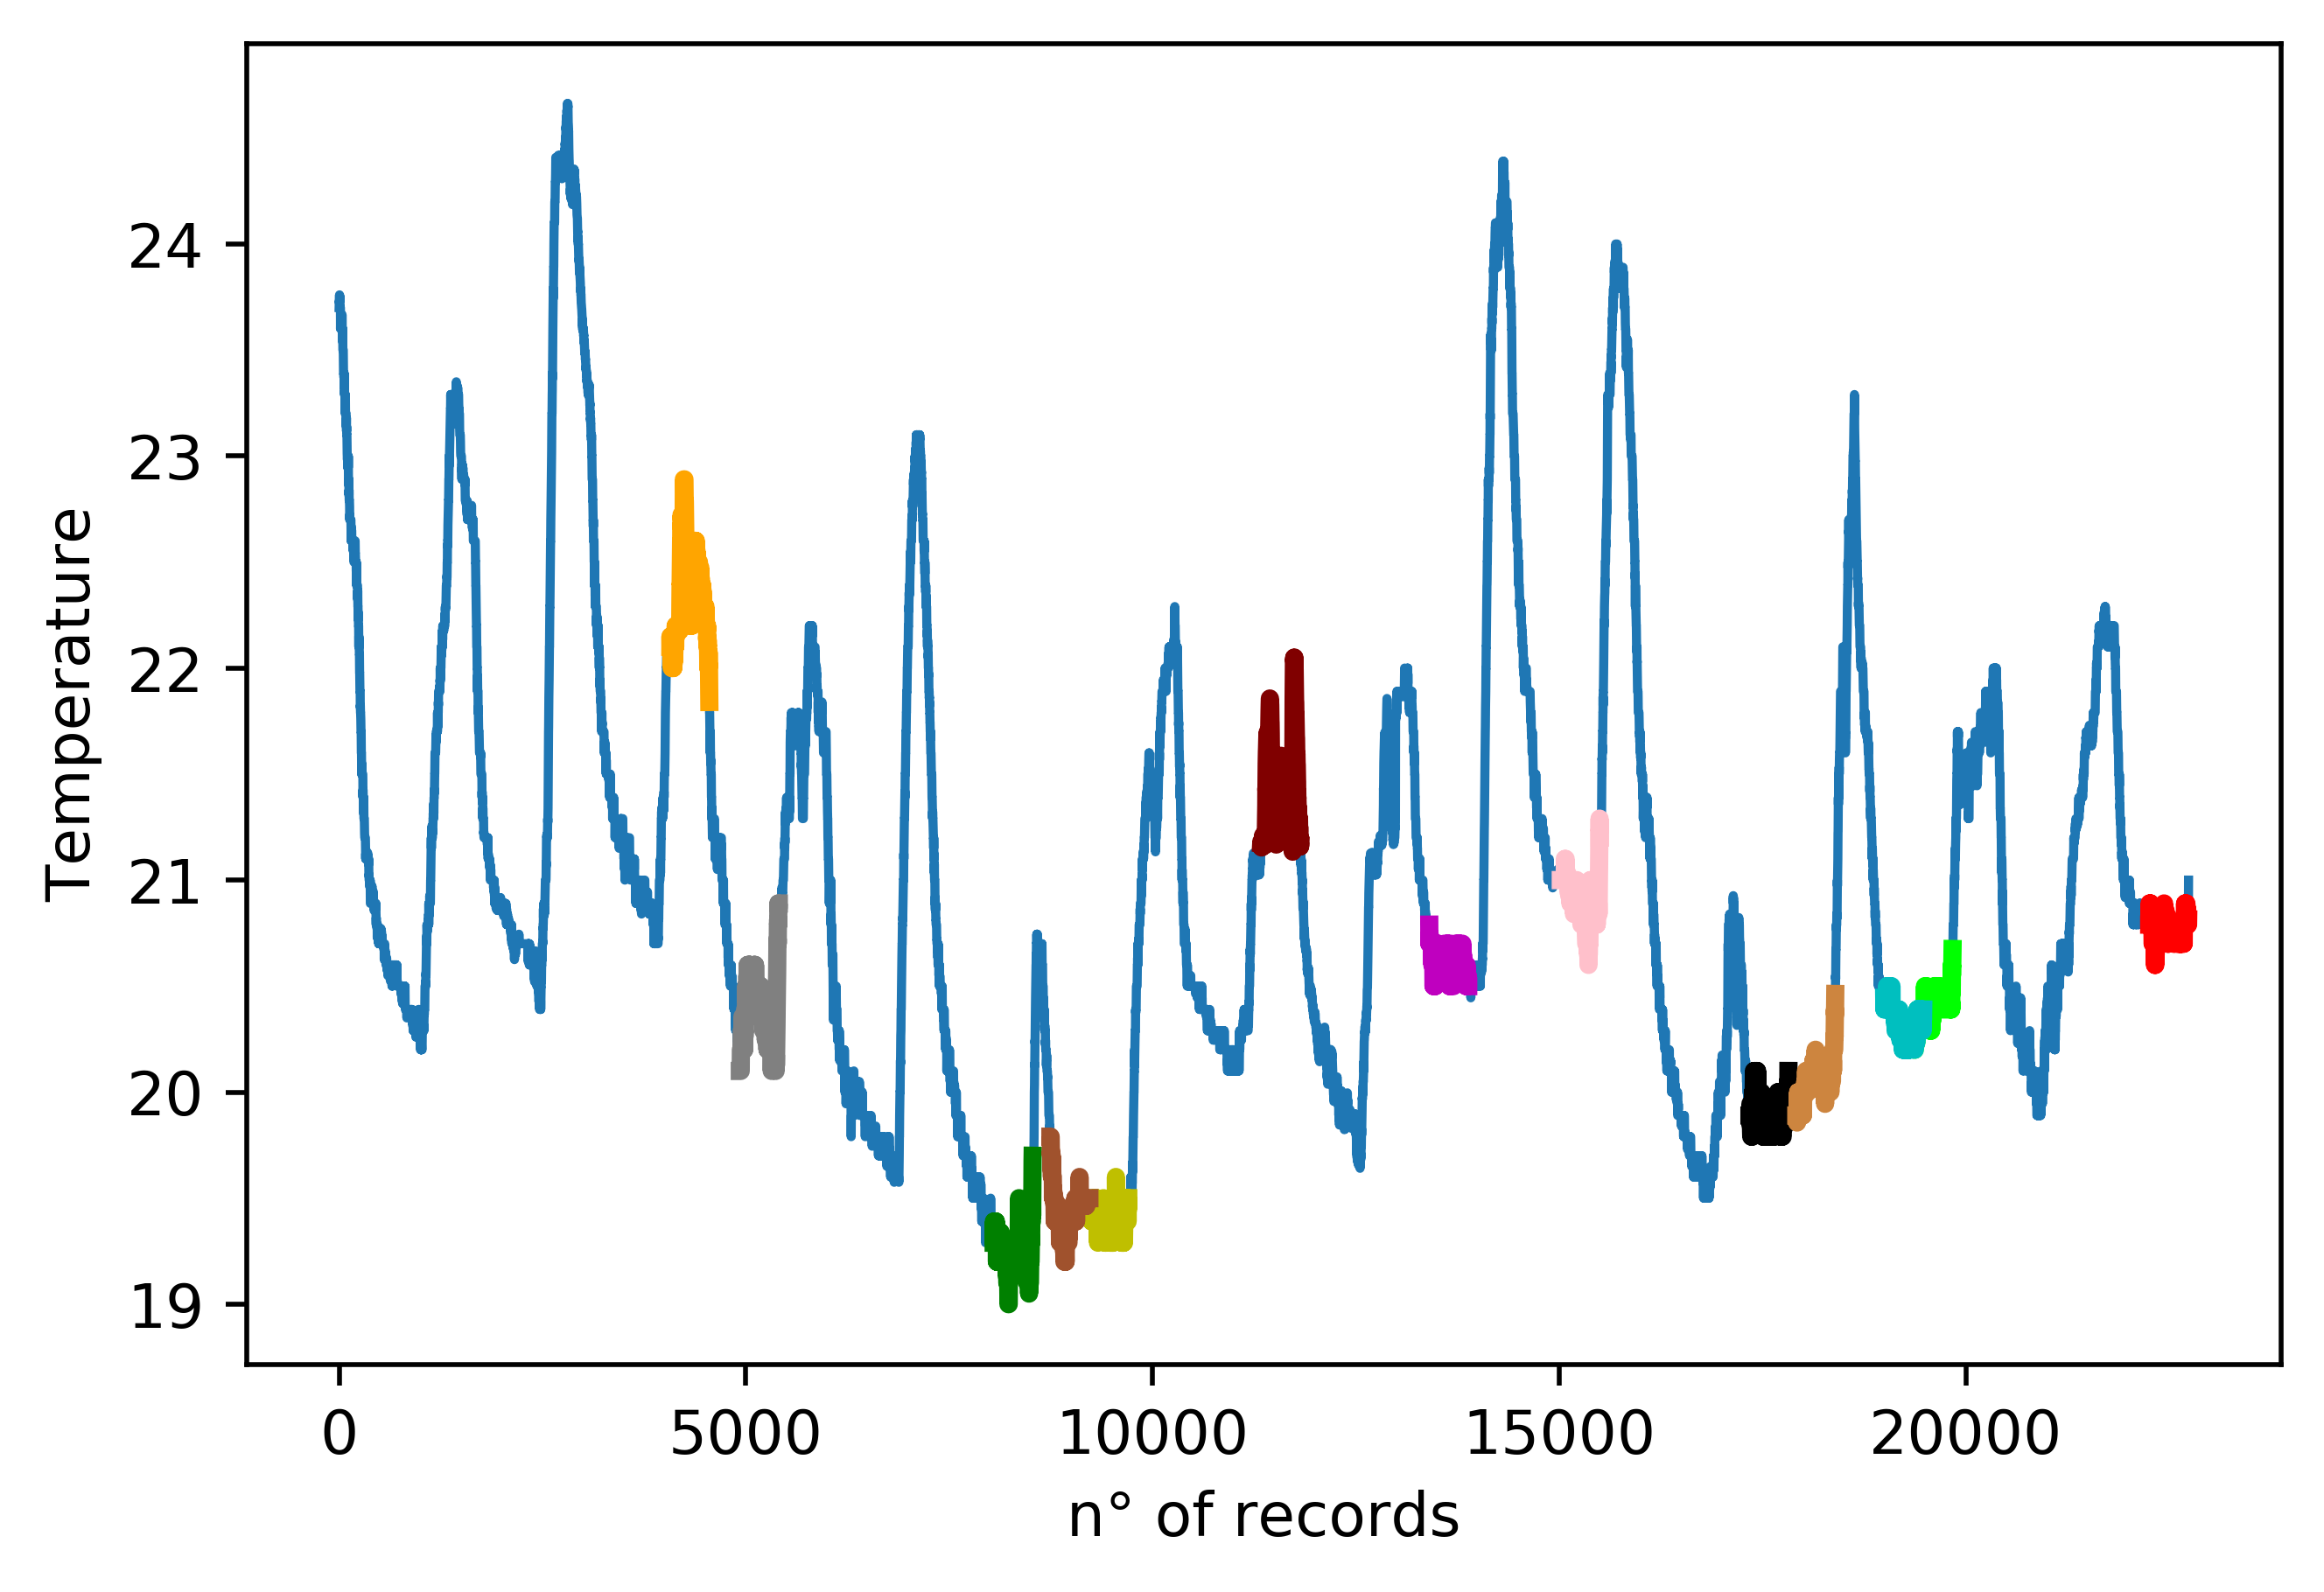

In [158]:
plt.plot(ts)
colors = ['y','r','g','maroon','m','black','grey','lime','orange','peru','pink','sienna','c'][:k]
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

        
plt.ylabel('Temperature')
plt.xlabel('n° of records')
plt.show()